# (1) 주제 선정 이유

축구를 좋아하는, 또 FC Barcelona를 좋아하는 사람으로서 항상 들었던 얘기가 있다. <br>
‘점유율이 높은 것과 이기는 것은 아무런 관련이 없다.’ <br>
FC Barcelona를 좋아하는 사람으로서 점유율을 포기한다는 것은 축구를 하지 않겠다는 것을 의미한다고 생각해서 이런 얘기를 들을 때마다 정말 화가 났다.<br>
그래서 점유율과 승리와의 관계성을 파악하여 점유율의 중요성과 FC Barcelona의 철학은 틀리지 않았음을 증명하고 싶다.

# (2) 가설 정의

``'점유율이 높을수록 공격성과 승리할 확률이 높다.'``

# (3) 인터넷을 통한 데이터 획득

3-1) xG, xGA, x Pts, All Goals For, All Goals Against의 값들 - > https://footballxg.com/xg-league-tables/ <br>

   3-2) Possession, Touches in Attacking 1/3 area, Touches in Attacking Penalty area, Shots Total, Matches Played의 값들<br>
    -> https://fbref.com/en/comps/12/10731/possession/2020-2021-La-Liga-Stats<br>

   3-3) Real Points , Number of Wins, Number of Loses의 값들<br>
    -> https://www.sofascore.com/tournament/football/spain/laliga/8<br>

   3-4)바르셀로나 경기 당 xG값의 값들 - > https://understat.com<br>

   python을 사용하기 위해 위에 있는 사이트에서 나와있는 데이터 중 비교할 때 필요할만한 데이터만 뽑아서 직접 csv파일을 만들어서 제작하였다.<br>

# (4), (5) 분석을 위한 데이터의 가공 및 분석 결과 도출

# pandas를 이용해 파일 불러오기

In [1]:
import pandas as pd

In [2]:
La_Liga_18_19 = pd.read_csv('../LaLiga_Data(csv)/La_Liga_18_19.csv', encoding = 'utf-8')
La_Liga_18_19

,Team,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses,Matches Played
0,Deportivo Alavés,42.7,4315,672,419,38.2,50.0,36,50,13,14,38
1,Athletic Club,50.1,5660,776,368,40.7,40.0,56,53,13,11,38
2,Atlético Madrid,49.4,6717,901,439,46.9,35.7,58,76,22,6,38
3,Barcelona,64.2,9151,1197,552,69.5,40.4,78,87,26,3,38
4,Real Betis,61.7,7121,960,440,46.1,45.9,54,50,14,16,38
5,Celta Vigo,51.7,5318,753,438,44.5,58.1,36,41,10,17,38
6,Eibar,54.1,7419,1026,519,49.3,43.4,57,47,11,13,38
7,Espanyol,49.5,5234,805,464,49.2,49.0,55,53,14,13,38
8,Getafe,40.8,5009,767,385,43.5,40.3,53,59,15,9,38
9,Girona,48.0,4554,710,394,43.0,51.3,42,37,9,19,38


In [3]:
import matplotlib.pyplot as plt

시각화자료가 필요하므로 ``matplotlib.pyplot``을 ``import``했다.

In [4]:
from matplotlib import rc
rc('font',family = 'AppleGothic')

한글이 필요하므로 ``matplotlib``에서 ``rc``을 ``import``한다.<br>
총 경기수는 여기서 필요없는 값이므로 삭제한다.

In [5]:
del La_Liga_18_19['Matches Played']

In [6]:
La_Liga_18_19

,Team,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses
0,Deportivo Alavés,42.7,4315,672,419,38.2,50.0,36,50,13,14
1,Athletic Club,50.1,5660,776,368,40.7,40.0,56,53,13,11
2,Atlético Madrid,49.4,6717,901,439,46.9,35.7,58,76,22,6
3,Barcelona,64.2,9151,1197,552,69.5,40.4,78,87,26,3
4,Real Betis,61.7,7121,960,440,46.1,45.9,54,50,14,16
5,Celta Vigo,51.7,5318,753,438,44.5,58.1,36,41,10,17
6,Eibar,54.1,7419,1026,519,49.3,43.4,57,47,11,13
7,Espanyol,49.5,5234,805,464,49.2,49.0,55,53,14,13
8,Getafe,40.8,5009,767,385,43.5,40.3,53,59,15,9
9,Girona,48.0,4554,710,394,43.0,51.3,42,37,9,19


In [7]:
La_Liga_18_19['Real Points - xG Pts'] = La_Liga_18_19['Real Points'] - La_Liga_18_19['xG Pts']
La_Liga_18_19

,Team,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses,Real Points - xG Pts
0,Deportivo Alavés,42.7,4315,672,419,38.2,50.0,36,50,13,14,14
1,Athletic Club,50.1,5660,776,368,40.7,40.0,56,53,13,11,-3
2,Atlético Madrid,49.4,6717,901,439,46.9,35.7,58,76,22,6,18
3,Barcelona,64.2,9151,1197,552,69.5,40.4,78,87,26,3,9
4,Real Betis,61.7,7121,960,440,46.1,45.9,54,50,14,16,-4
5,Celta Vigo,51.7,5318,753,438,44.5,58.1,36,41,10,17,5
6,Eibar,54.1,7419,1026,519,49.3,43.4,57,47,11,13,-10
7,Espanyol,49.5,5234,805,464,49.2,49.0,55,53,14,13,-2
8,Getafe,40.8,5009,767,385,43.5,40.3,53,59,15,9,6
9,Girona,48.0,4554,710,394,43.0,51.3,42,37,9,19,-5


실제 얻은 점수와 얻을거라고 예상되는 점수, 즉 ``Real Points``와 ``xPts``의 값을 빼서 새로운 열을 만든다.<br>
이때 양수의 값이 나오면 좀 더 경기를 잘해서 예상보다 더 높이 점수를 받았다는 것을 의미한다.<br> 
이 값과 점유율 값을 ``numpy``의 ``corrcoef``함수를 이용해서 상관관계를 파악해본다.

# 상관관계 분석하기

In [8]:
import numpy as np

In [9]:
np.corrcoef(La_Liga_18_19['Real Points - xG Pts'],La_Liga_18_19['Possession'])

array([[ 1.       , -0.1128069],
       [-0.1128069,  1.       ]])

상관관계 계수의 값을 읽는 방법은 주대각선을 기준으로 대칭인 수가 상관관계 계수이고 이를 분석하는 방법은 (상관관계 계수 = r)<br>
r이 ``-1.0``과 ``-0.7`` 사이이면, 강한 음적 선형관계, <br>
r이 ``-0.7``과 ``-0.3`` 사이이면, 뚜렷한 음적 선형관계, <br>
r이 ``-0.3``과 ``-0.1`` 사이이면, 약한 음적 선형관계, <br>
r이 ``-0.1``과 ``+0.1`` 사이이면, 거의 무시될 수 있는 선형관계, <br>
r이 ``+0.1``과 ``+0.3`` 사이이면, 약한 양적 선형관계, <br>
r이 ``+0.3``과 ``+0.7`` 사이이면, 뚜렷한 양적 선형관계, <br>
r이 ``+0.7``과 ``+1.0`` 사이이면, 강한 양적 선형관계 <br>
로 분석할 수 있다.

이로써 점유율과 Real Poins - xG Pts의 값은 약한 음적 선형관계가 있다는 것을 확인했다.<br>
이런 식으로 값을 확인해 점유율과 관계가 약한것은 지워나가도록 하겠다.

In [10]:
del La_Liga_18_19['Real Points - xG Pts']

In [11]:
np.corrcoef(La_Liga_18_19['Touches in Attacking 1/3 area'],La_Liga_18_19['Possession'])

array([[1.        , 0.87454206],
       [0.87454206, 1.        ]])

In [12]:
np.corrcoef(La_Liga_18_19['Touches in Attacking Penalty area'],La_Liga_18_19['Possession'])

array([[1.      , 0.760077],
       [0.760077, 1.      ]])

In [13]:
np.corrcoef(La_Liga_18_19['Shots Total'],La_Liga_18_19['Possession'])

array([[1.        , 0.64813474],
       [0.64813474, 1.        ]])

In [14]:
np.corrcoef(La_Liga_18_19['Expected Goals For (xG)'],La_Liga_18_19['Possession'])

array([[1.        , 0.64588918],
       [0.64588918, 1.        ]])

In [15]:
np.corrcoef(La_Liga_18_19['Expected Goals Against (xGA)'],La_Liga_18_19['Possession'])

array([[ 1.        , -0.21745393],
       [-0.21745393,  1.        ]])

In [16]:
np.corrcoef(La_Liga_18_19['xG Pts'],La_Liga_18_19['Possession'])

array([[1.        , 0.57851437],
       [0.57851437, 1.        ]])

In [17]:
np.corrcoef(La_Liga_18_19['Real Points'],La_Liga_18_19['Possession'])

array([[1.       , 0.4916014],
       [0.4916014, 1.       ]])

In [18]:
np.corrcoef(La_Liga_18_19['Number of Wins'],La_Liga_18_19['Possession'])

array([[1.        , 0.56697266],
       [0.56697266, 1.        ]])

In [19]:
np.corrcoef(La_Liga_18_19['Number of Loses'],La_Liga_18_19['Possession'])

array([[ 1.        , -0.34462823],
       [-0.34462823,  1.        ]])

이로써 모든 값들을 비교해보았을 때 상대적으로 상관계수가 작은 것들은 ``xGA``값이랑 ``Number of Loses``값이다.<br>
따라서 이 두 개의 값을 삭제하겠다.

In [20]:
del La_Liga_18_19['Number of Loses']
del La_Liga_18_19['Expected Goals Against (xGA)']

In [21]:
import pandas as pd

In [22]:
corrcoef = pd.DataFrame({'values' : [0.874542,0.760077,0.648135,0.645889,0.578514,0.491601,0.49584]},
                        index = ['1/3 area','penalty area','Shots','xG','xG Pts','Real Points','Number of Wins'])       

In [23]:
corrcoef

,values
1/3 area,0.874542
penalty area,0.760077
Shots,0.648135
xG,0.645889
xG Pts,0.578514
Real Points,0.491601
Number of Wins,0.495840


In [24]:
corrcoef.sort_values('values',ascending = False)

,values
1/3 area,0.874542
penalty area,0.760077
Shots,0.648135
xG,0.645889
xG Pts,0.578514
Number of Wins,0.495840
Real Points,0.491601


이로써 점유율과 관련된 상관계수 중 관련이 없다고 생각되는 것은 삭제하고 관련있는 것들끼리 모아 관련있는 순으로 정렬을 시켰다.

그럼 실제로 숫자값이 아닌 그래프를 그려서 얼마나 비슷한지 알아보도록 하자.

#  그래프로 상관계수 실제로 비교해보기

In [25]:
import matplotlib.pyplot as plt

In [26]:
laliga1819 = La_Liga_18_19[:]

csv파일명이 길고 치기 힘들어서 간단하게 바꿨다.

In [27]:
laliga1819.set_index('Team', inplace = True)
laliga1819

,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,Expected Goals For (xG),xG Pts,Real Points,Number of Wins
Team,,,,,,,,
Deportivo Alavés,42.7,4315,672,419,38.2,36,50,13
Athletic Club,50.1,5660,776,368,40.7,56,53,13
Atlético Madrid,49.4,6717,901,439,46.9,58,76,22
Barcelona,64.2,9151,1197,552,69.5,78,87,26
Real Betis,61.7,7121,960,440,46.1,54,50,14
Celta Vigo,51.7,5318,753,438,44.5,36,41,10
Eibar,54.1,7419,1026,519,49.3,57,47,11
Espanyol,49.5,5234,805,464,49.2,55,53,14
Getafe,40.8,5009,767,385,43.5,53,59,15


/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


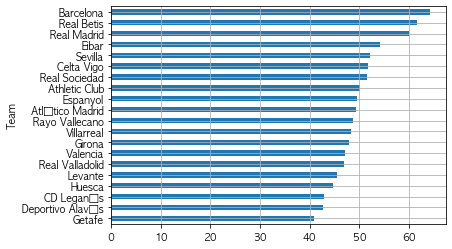

In [28]:
laliga1819['Possession'].sort_values().plot(kind = 'barh',grid = True)
plt.show()

그래프 사이즈가 작아서 보기가 힘들다. 좀 더 키워보자

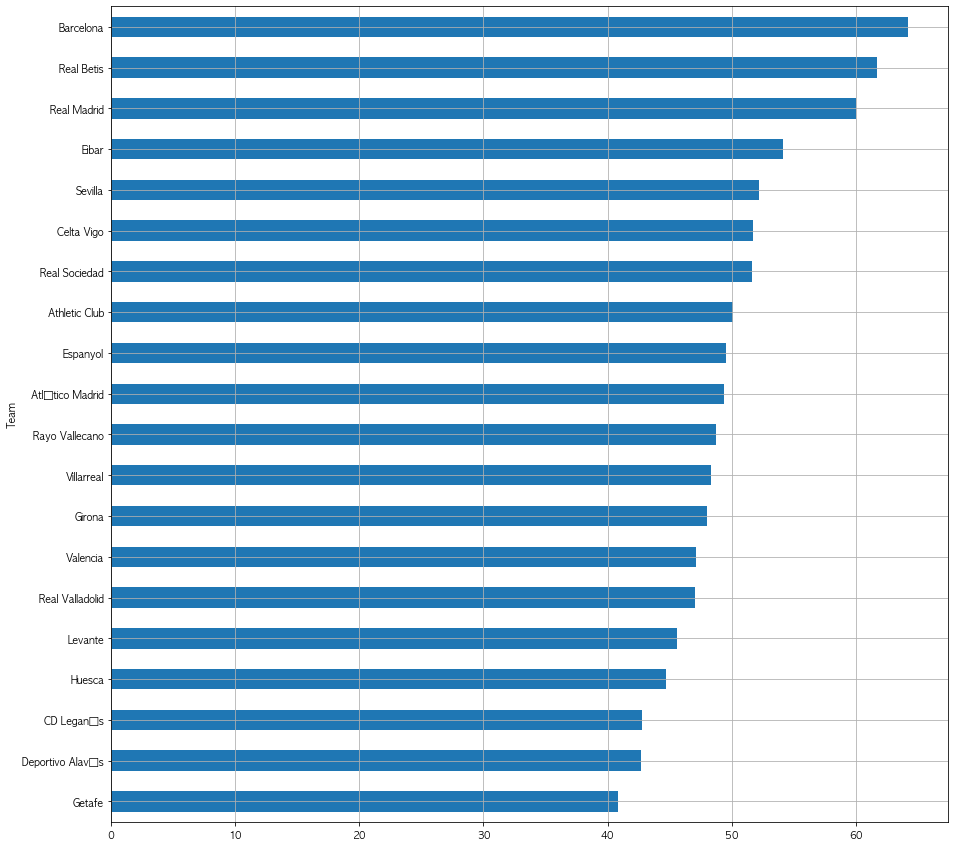

In [29]:
laliga1819['Possession'].sort_values().plot(kind = 'barh',grid = True, figsize = (15,15))
plt.show()

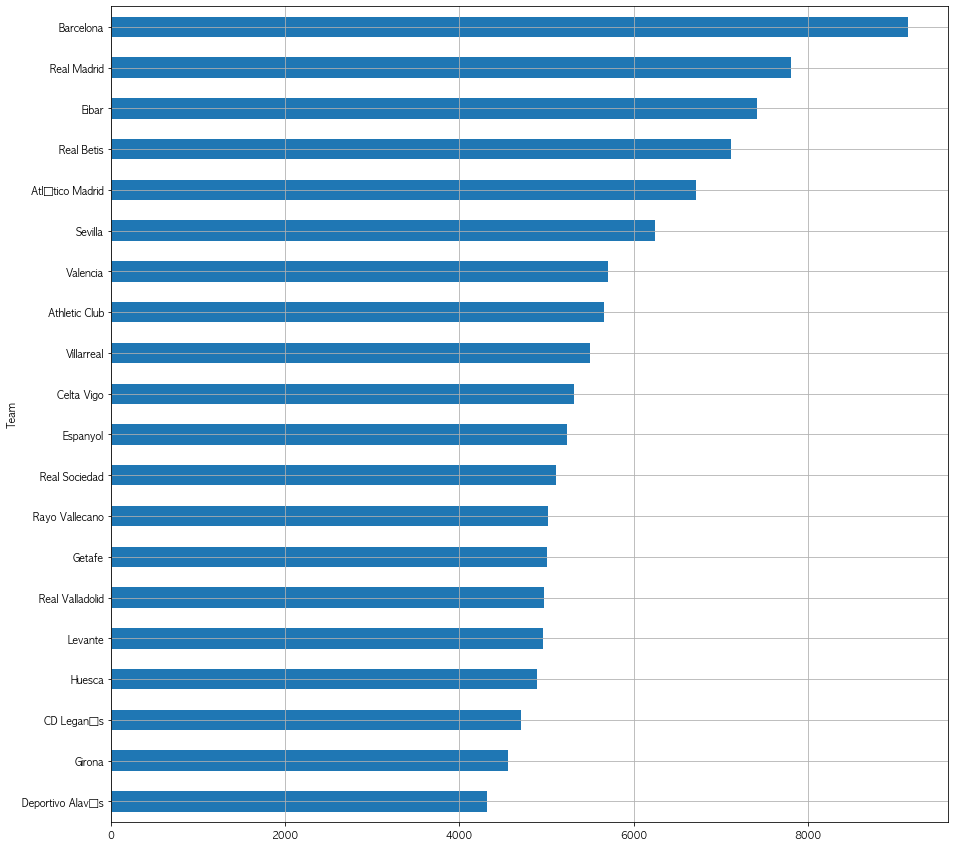

In [30]:
laliga1819['Touches in Attacking 1/3 area'].sort_values().plot(kind = 'barh',grid = True,figsize=(15,15))
plt.show()

In [31]:
df2 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'Touches in Attacking 1/3 area' : ['Barcelona','Real Madrid','Eibar','Real Betis',\
                                                     'Atletico Madrid','Sevilla','Valencia','Athletic Club',\
                                                     'Villareal','Celta Vigo','Espanyol','Real Sociedad',\
                                                     'Rayo Vallecano','Getafe','Real Valladolid','Levante',\
                                                     'Huesca','CD Leganes','Girona','Deportivo Alaves']})

In [32]:
df2

,Possession,Touches in Attacking 1/3 area
0,Barcelona,Barcelona
1,Real Betis,Real Madrid
2,Real Madrid,Eibar
3,Eibar,Real Betis
4,Sevilla,Atletico Madrid
5,Celta Vigo,Sevilla
6,Real Sociedad,Valencia
7,Athletic Club,Athletic Club
8,Espanyol,Villareal
9,Atletico Madrid,Celta Vigo


이 결과로 알 수 있는 것은 그래프로 봤을 때도 상위권팀들의 순위도 ``Possession``과 차이가 크게 나지 않는다는 것이다.<br>
하지만 그래프로 보면서 평균값이나 ``점유율``이 높을수록 ``1/3지역에서의 터치횟수``도 높다는 것을 잘 모르겠다.<br>
그래서 점으로 나타낸 그래프로 표현하여 평균을 가지는 직선을 표현한 뒤 점유율이 높으면 ``1/3지역에서의 터치횟수``도 높아진다는 것을 증명해보려고 한다.<br>


# 마지막 결과 증명하기

# 점유율과 1/3 지역 터치 횟수 증명

In [33]:
coefficient = np.polyfit(laliga1819['Possession'],laliga1819['Touches in Attacking 1/3 area'],1)
coefficient

array([  178.06894982, -3134.82818065])

In [34]:
fy = np.poly1d(coefficient)
fx = np.linspace(40,65,3)

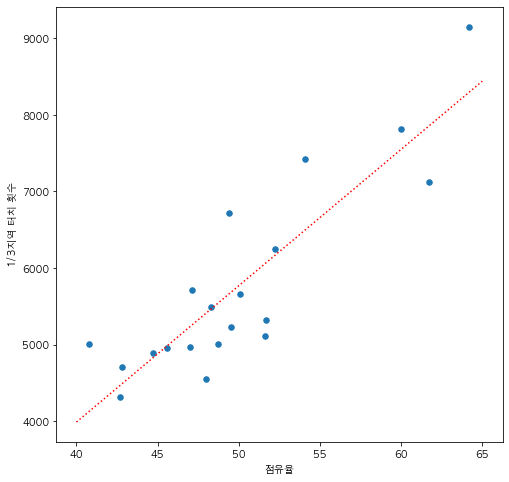

In [35]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['Touches in Attacking 1/3 area'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('1/3지역 터치 횟수')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높을수록 평균보다 큰 값들이 많고 점유율이 낮을수록 평균보다 낮은 값들이 많다는 것을 알게 되었다.<br>
따라서 점유율이 높을수록 1/3지역에서의 터치 횟수가 높다는 것을 증명했다.<br>
1/3 지역에서의 터치 횟수가 높다는 것은 축구에서는 승리할 수 있는 확률이 높다는 것을 의미함으로 가설 증명에 한 발자국 가까이 갔다.

위의 과정을 아까 정리한 값들에 똑같이 적용해서 점유율이 높을수록 각각의 값들이 높다는 것을 증명할 것이다.<br>

# 점유율과 페널티 지역에서의 터치 증명

/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


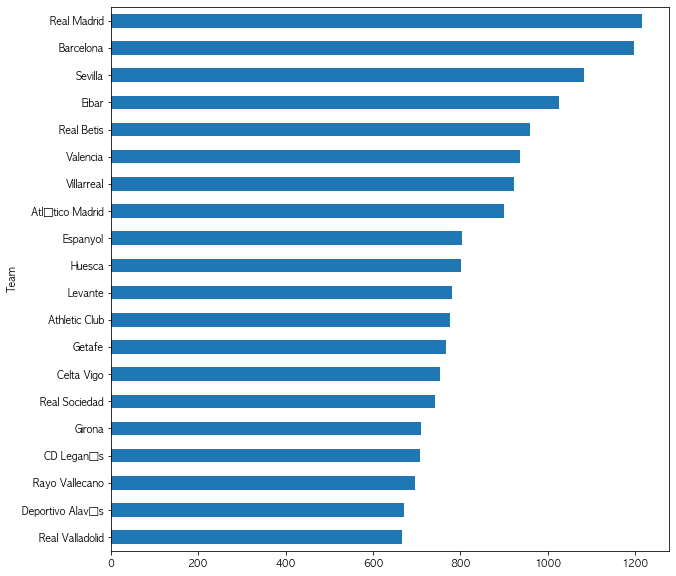

In [36]:
laliga1819['Touches in Attacking Penalty area'].sort_values().plot(kind = 'barh',figsize=(10,10))
plt.show()

In [37]:
df3 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'Touches in Attacking Penalty area' : ['Real Madrid','Barcelona','Sevilla','Eibar',\
                                                     'Real Betis','Valencia','Villareal','Athletico Madrid',\
                                                     'Espanyol','Huesca','Levante','Athletic Club',\
                                                     'Getafe','Celta Vigo','Real Sociedad','Girona',\
                                                     'CD Leganes','Rayo Vallecano','Deportivo Alaves',\
                                                          'REal Valladolid']})

In [38]:
df3

,Possession,Touches in Attacking Penalty area
0,Barcelona,Real Madrid
1,Real Betis,Barcelona
2,Real Madrid,Sevilla
3,Eibar,Eibar
4,Sevilla,Real Betis
5,Celta Vigo,Valencia
6,Real Sociedad,Villareal
7,Athletic Club,Athletico Madrid
8,Espanyol,Espanyol
9,Atletico Madrid,Huesca


In [39]:
coefficient1 = np.polyfit(laliga1819['Possession'],laliga1819['Touches in Attacking Penalty area'],1)
coefficient1

array([  20.65887275, -177.05022633])

In [40]:
fy = np.poly1d(coefficient1)
fx = np.linspace(40,65,3)

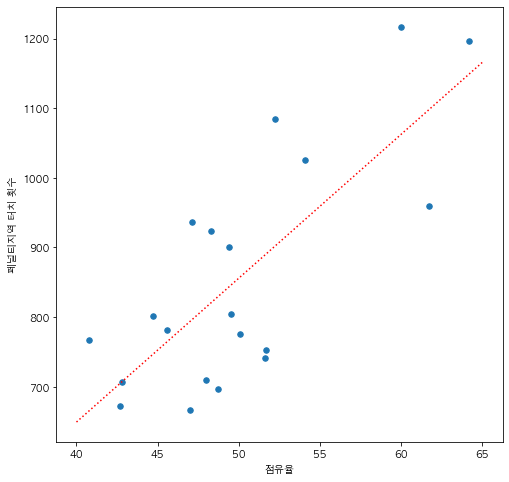

In [41]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['Touches in Attacking Penalty area'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('페널티지역 터치 횟수')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높을수록 평균보다 큰 값들이 많고 점유율이 낮을수록 평균보다 낮은 값들이 많다는 것을 알게 되었다.<br>
따라서 점유율이 높을수록 페널티지역에서의 터치 횟수가 높다는 것을 증명했다.<br>
페널티지역에서의 터치 횟수가 높다는 것은 축구에서는 승리할 수 있는 확률이 높다는 것을 의미한다.

# 점유율과 총 슈팅 횟수 증명

/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


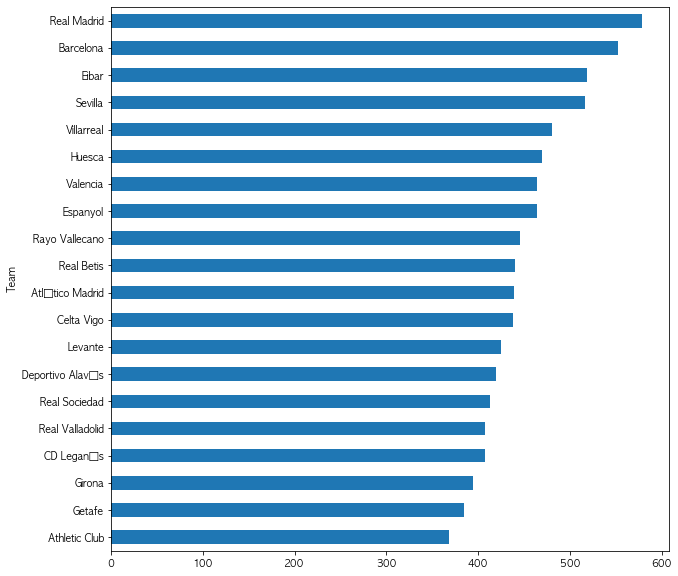

In [42]:
laliga1819['Shots Total'].sort_values().plot(kind = 'barh',figsize = (10,10))
plt.show()

In [43]:
df4 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'Shots Total' : ['Real Madrid','Barcelona','Eibar','Sevilla',\
                                                     'Villareal','Huesca','Valencia','Espanyol',\
                                                     'Rayo Vallecano','Real Betis','Ateltico Madrid','Celta Vigo',\
                                                     'Levante','Deportivo Alaves','Real Sociedad','Real Valladolid',\
                                                     'CD Leganes','Girona','Getafe','REal Valladolid']})

In [44]:
df4

,Possession,Shots Total
0,Barcelona,Real Madrid
1,Real Betis,Barcelona
2,Real Madrid,Eibar
3,Eibar,Sevilla
4,Sevilla,Villareal
5,Celta Vigo,Huesca
6,Real Sociedad,Valencia
7,Athletic Club,Espanyol
8,Espanyol,Rayo Vallecano
9,Atletico Madrid,Real Betis


In [45]:
coefficient2 = np.polyfit(laliga1819['Possession'],laliga1819['Shots Total'],1)
coefficient2

array([  5.82463966, 160.0597704 ])

In [46]:
fy = np.poly1d(coefficient2)
fx = np.linspace(40,65,3)

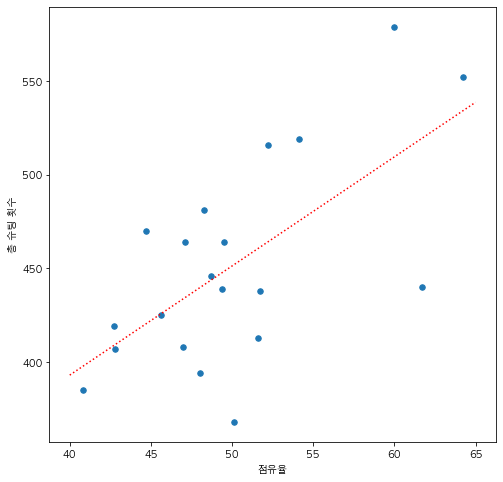

In [47]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['Shots Total'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('총 슈팅 횟수')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높을수록 평균보다 큰 값들이 많고 점유율이 낮을수록 평균보다 낮은 값들이 많다는 것을 알게 되었다.<br>
따라서 점유율이 높을수록 슈팅횟수가 높다는 것을 증명했다.<br>
슈팅횟수가 높다는 것은 당연하게도 골을 넣을 수 있는 기회가 많다는 것이고 골을 넣을 수 있는 기회가 많다는 것은 <br>
승리할 수 있는 확률이 높다는 것을 의미한다.

# 점유율과 기대 득점 증명

/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


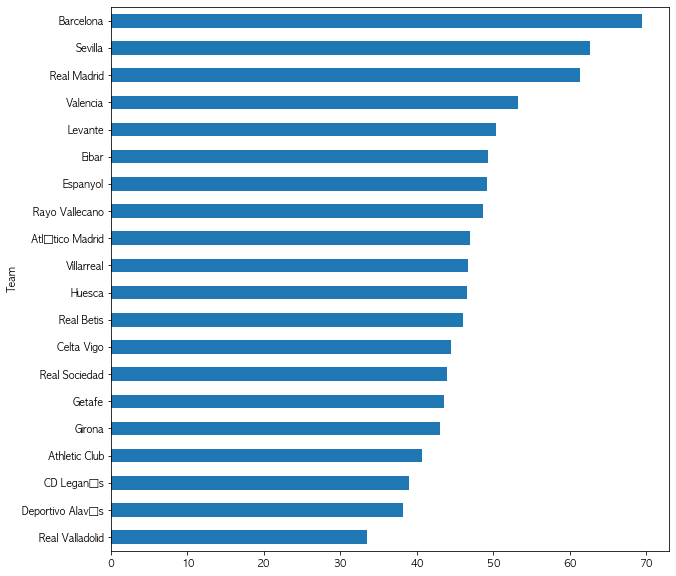

In [48]:
laliga1819['Expected Goals For (xG)'].sort_values().plot(kind = 'barh',figsize = (10,10))
plt.show()

In [49]:
df5 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'Expected Goals For (xG)' : ['Barcelona','Sevilla','Real Madrid','Valencia',\
                                                     'Levante','Eibar','Espanyol','Rayo Vallecano',\
                                                     'Athletico Madrid','Villareal','Huesca','Real Betis',\
                                                     'Celta Vigo','Real Sociedad','Getafe','Girona',\
                                                     'Athletic Club','CD Leganes','Deportivo Alaves','Real Valladolid']})
df5

,Possession,Expected Goals For (xG)
0,Barcelona,Barcelona
1,Real Betis,Sevilla
2,Real Madrid,Real Madrid
3,Eibar,Valencia
4,Sevilla,Levante
5,Celta Vigo,Eibar
6,Real Sociedad,Espanyol
7,Athletic Club,Rayo Vallecano
8,Espanyol,Athletico Madrid
9,Atletico Madrid,Villareal


In [50]:
coefficient3 = np.polyfit(laliga1819['Possession'],laliga1819['Expected Goals For (xG)'],1)
coefficient3

array([0.8990922 , 2.88639894])

In [51]:
fy = np.poly1d(coefficient3)
fx = np.linspace(40,65,3)

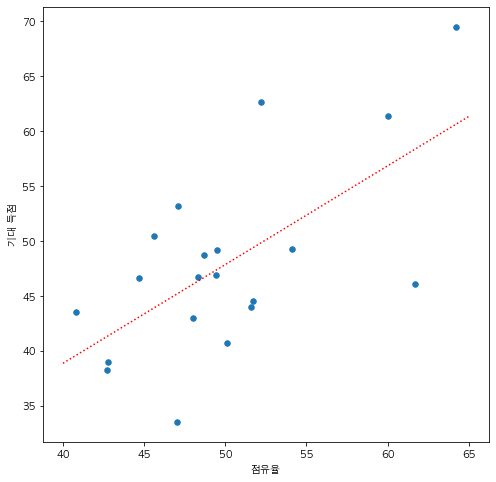

In [52]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['Expected Goals For (xG)'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('기대 득점')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높다고 기대 득점이 많아진다고 보는 것은 무리가 있다고 볼 수 있다. 왜냐하면 점유율이 낮아도 평균이상인 값들이 7개,<br>
점유율이 낮아도 평균이하인 값들이 8개이기 때문이다.<br>
따라서 점유율이 높아도 기대 득점이 안 높다는 것을 증명하였다.

# 점유율과 기대 점수 증명

/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


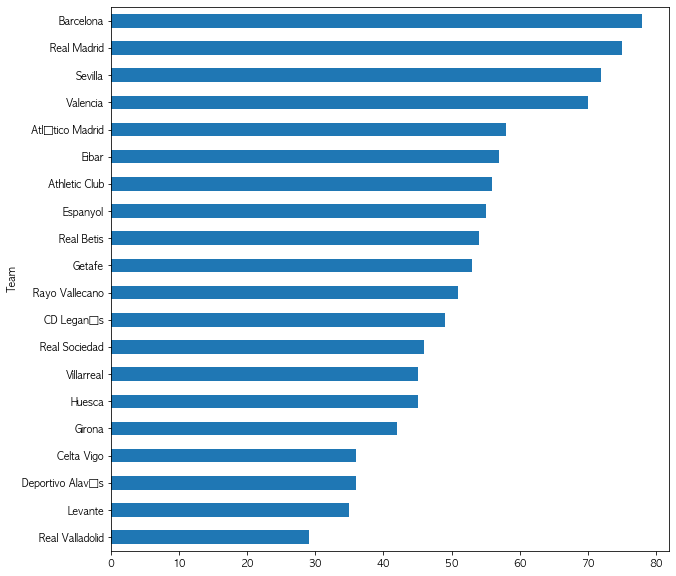

In [53]:
laliga1819['xG Pts'].sort_values().plot(kind = 'barh',figsize = (10,10))
plt.show()

In [54]:
df6 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'xG Pts' : ['Barcelona','Real Madrid','Sevilla','Valencia',\
                                                     'Athletico Madrid','Eibar','Athletic Club','Espanyol',\
                                                     'Real Betis','Getafe','Rayo Vallecano','CD Leganes',\
                                                     'Real Sociedad','Villareal','Huesca','Girona',\
                                                     'Celta Vigo','Deportivo Alaves','Levante','Real Valladolid']})
df6

,Possession,xG Pts
0,Barcelona,Barcelona
1,Real Betis,Real Madrid
2,Real Madrid,Sevilla
3,Eibar,Valencia
4,Sevilla,Athletico Madrid
5,Celta Vigo,Eibar
6,Real Sociedad,Athletic Club
7,Athletic Club,Espanyol
8,Espanyol,Real Betis
9,Atletico Madrid,Getafe


In [55]:
coefficient4 = np.polyfit(laliga1819['Possession'],laliga1819['xG Pts'],1)
coefficient4

array([  1.28407667, -12.1166743 ])

In [56]:
fy = np.poly1d(coefficient4)
fx = np.linspace(40,65,3)

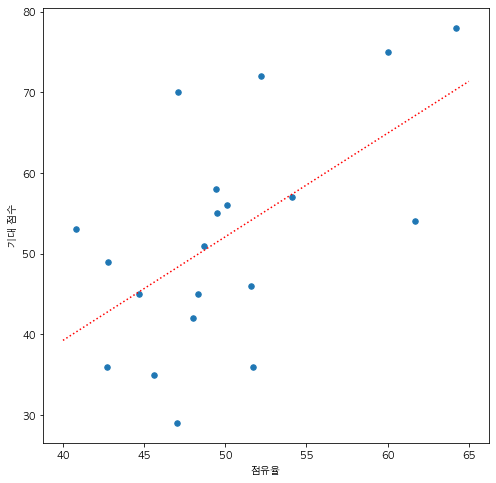

In [57]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['xG Pts'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('기대 점수')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높다고 기대 점수가 높아진다고 보는 것은 무리가 있다고 볼 수 있다. 왜냐하면 점유율이 낮아도 평균이상인 값들이 5-6개,<br>
점유율이 낮아도 평균이하인 값들이 5-6개이기 때문이다.<br>
따라서 점유율이 높아도 기대 점수가 안 높다는 것을 증명하였다.

# 점유율과 실제 점수 증명

/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


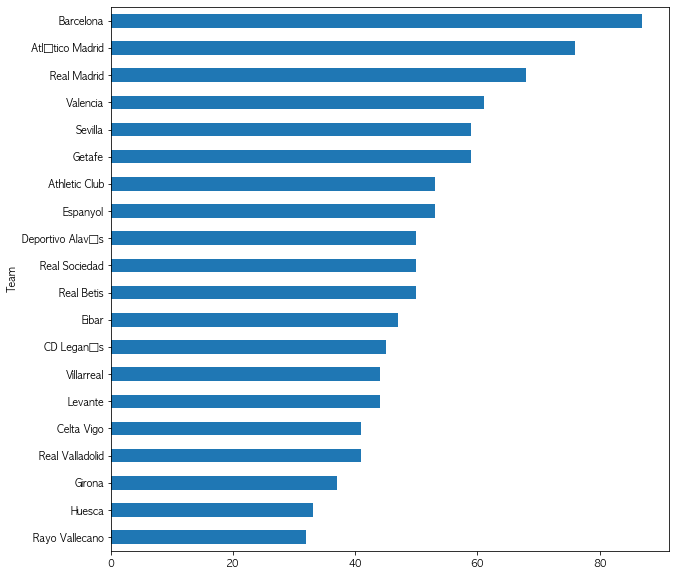

In [58]:
laliga1819['Real Points'].sort_values().plot(kind = 'barh',figsize = (10,10))
plt.show()

In [59]:
df6 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'Real Points' : ['Barcelona','Athletico Madrid','Real Madrid','Valencia',\
                                                     'Sevilla','Getafe','Athletic Club','Espanyol',\
                                                     'Deportivo Alaves','Real Sociedad','Real Betis','Eibar',\
                                                     'CD Leganes','Villareal','Levante','Celta Vigo',\
                                                     'Real Valladolid','Girona','Huesca','Rayo Vallecano']})
df6

,Possession,Real Points
0,Barcelona,Barcelona
1,Real Betis,Athletico Madrid
2,Real Madrid,Real Madrid
3,Eibar,Valencia
4,Sevilla,Sevilla
5,Celta Vigo,Getafe
6,Real Sociedad,Athletic Club
7,Athletic Club,Espanyol
8,Espanyol,Deportivo Alaves
9,Atletico Madrid,Real Sociedad


In [60]:
coefficient5 = np.polyfit(laliga1819['Possession'],laliga1819['Real Points'],1)
coefficient5

array([ 1.10342199, -3.68213386])

In [61]:
fy = np.poly1d(coefficient5)
fx = np.linspace(40,65,3)

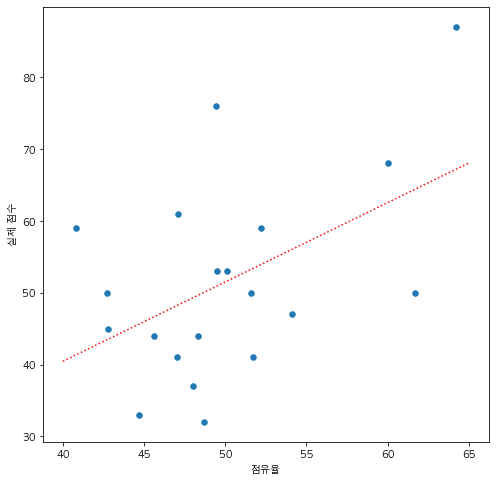

In [62]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['Real Points'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('실제 점수')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높다고 기대 점수가 높아진다고 보는 것은 무리가 있다고 볼 수 있다. 왜냐하면 점유율이 낮아도 평균이상인 값들이 5-6개, <br>
점유율이 낮아도 평균이하인 값들이 5-6개이기 때문이다.<br>
따라서 점유율이 높아도 실제 점수가 안 높다는 것을 증명하였다.

# 점유율과 승리 횟수 증명

/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


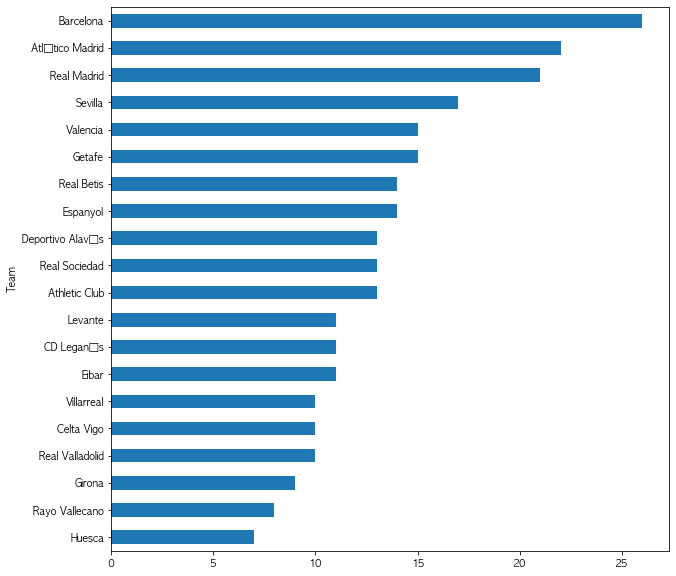

In [63]:
laliga1819['Number of Wins'].sort_values().plot(kind = 'barh',figsize = (10,10))
plt.show()

In [64]:
df6 = pd.DataFrame({'Possession' : ['Barcelona','Real Betis','Real Madrid','Eibar','Sevilla','Celta Vigo'\
                                   ,'Real Sociedad','Athletic Club','Espanyol','Atletico Madrid',\
                                   'Rayo Vallecano','Villareal','Girona','Valencia','Real Valladolid',\
                                   'Levante','Huesca','CD Leganes','Deportivo Alaves','Getafe'],\
                   'Number of Wins' : ['Barcelona','Athletico Madrid','Real Madrid',\
                                                     'Sevilla','Valencia','Getafe','Real Betis',\
                                                     'Espanyol','Deportivo Alaves','Real Sociedad','Athletic Club',\
                                                     'Levante','CD Leganes','Eibar','Villareal',\
                                                     'Celta Vigo','Real Valladolid','Girona','Rayo Vallecano'\
                                      ,'Huesca']})
df6

,Possession,Number of Wins
0,Barcelona,Barcelona
1,Real Betis,Athletico Madrid
2,Real Madrid,Real Madrid
3,Eibar,Sevilla
4,Sevilla,Valencia
5,Celta Vigo,Getafe
6,Real Sociedad,Real Betis
7,Athletic Club,Espanyol
8,Espanyol,Deportivo Alaves
9,Atletico Madrid,Real Sociedad


In [65]:
coefficient6 = np.polyfit(laliga1819['Possession'],laliga1819['Number of Wins'],1)
coefficient6

array([ 0.44581045, -8.79498066])

In [66]:
fy = np.poly1d(coefficient6)
fx = np.linspace(40,65,3)

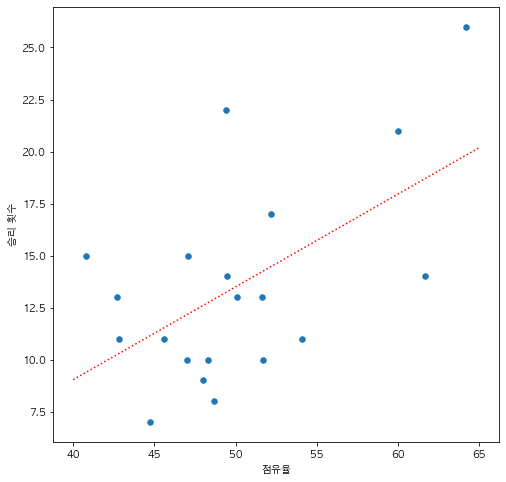

In [67]:
plt.figure(figsize = (8,8))
plt.scatter(laliga1819['Possession'],laliga1819['Number of Wins'],s = 30)
plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
plt.xlabel('점유율')
plt.ylabel('승리 횟수')
plt.show()

직선은 점들의 평균을 말한다. <br>
이로써 알 수 있는 결과는 점유율이 높을수록 평균보다 큰 값들이 많고 점유율이 낮을수록 평균보다 낮은 값들이 많다는 것을 알게 되었다.<br>
따라서 점유율이 높을수록 승리 횟수가 높다는 것을 증명했다.<br>
이 값은 바로 직감적으로 알 수 있듯이 점유율이 높으면 승리할 확률이 높다.

따라서 알 수 있는 것은 ``점유율``이 높을수록 ``승리 횟수``랑 ``총 슈팅횟수``, ``페널티 지역 터치 횟수``, ``1/3지역 터치 횟수``가 높다는 것을 확인할 수 있고<br>
``실제 점수``,``기대 점수``,``기대 득점``은 점유율과 무관하다는 결과를 얻게 되었다.

하지만 이상한 것이 있다. <br>승리횟수가 점유율이 높을수로 높은데 실제 점수는 점유율이 높을수로 높지 않다는 것이 모순인 것 같다. <br>왜냐하면 실제 점수가 높다는 말은 승리횟수가 많다는 말인데 둘이 상반된 결과가 나왔기 때문이다. <br>따라서 한 데이터로 결론을 단정짓기에는 데이터가 부족하므로 다른 리그의 데이터도 비교해보겠다.

아까의 과정속에서 실행했던 것들을 함수로 만들어서 간단하게 진행하도록 했다.

# 반복과정 중 필요한 함수 만들기

In [36]:
def csvReader(x,y) :
    import pandas as pd
    x = pd.read_csv(y,encoding = 'utf-8')
    return x

첫번째로 csv파일을 불러올 때 ``pandas``를 ``import``하는 것과 ``read_csv``을 사용하는 것을 하나의 함수안에 다 담아서 편리하게 사용하도록 했다.

In [37]:
def corrcoef(x,y) :
    import numpy as np
    k = np.corrcoef(x,y)
    corrcoef = abs(k[0][1])
    if corrcoef <= 0.1 :
        del y
        return '삭제됨'
    if corrcoef <= 0.3:
        listSmall = [corrcoef,'약한 상관관계']
        return listSmall
    if corrcoef <= 0.7 :
        listDistinct = [corrcoef,'뚜렷한 상관관계']
        return listDistinct
    if corrcoef <= 1 :
        listStrong = [corrcoef,'강한 상관관계']
        return listStrong

상관관계를 파악하기위해 ``numpy``의 ``corrcoef``함수를 사용했는데 이 똑같이 ``import``하는 것도 함수안에 다 담아서 편리하게 사용하도록 했다.<br>
또한 값을 넣으면 숫자와 글자가 같이 나와 정확하게 값을 알 수 있고 상관관계가 거의 없다고 볼 수 있는 열은 바로 삭제하도록 설정했다.<br>
주의해야할 점은 무조건 x값에 ``Possession``을 넣고 y값에 비교할 값을 넣는다.

In [38]:
def makeBarh(x) : 
    import matplotlib.pyplot as plt
    x.sort_values().plot(kind = 'barh',figsize = (10,10))
    return plt.show()

``barh``형태의 그래프를 만들기 위한 함수이다

In [39]:
def LastGraph(x,y) :
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import rc
    rc('font',family = 'AppleGothic')
    coefficient = np.polyfit(x,y,1)
    fy = np.poly1d(coefficient)
    fx = np.linspace(40,65,3)
    plt.figure(figsize = (8,8))
    plt.scatter(x,y,s = 30)
    plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
    x = str(input('Enter the xlabel : '))
    y = str(input('Enter the ylabel : '))
    plt.xlabel(x)
    plt.ylabel(y)
    
    return plt.show()

마지막 ``scatter``그래프와 ``1차함수``를 만드는 함수이다.

``다른 리그의 같은 시즌 분석하기``

# 분데스리가 분석하기

In [16]:
bundeseliga_18_19 = csvReader('bundeseliga1819','../Bundeseliga Data(csv)/Bundeseliga_18_19.csv')
bundeseliga_18_19

,Team,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,All Goals For,All Goals Against,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses
0,Arminia,46.6,4287,690,443,51,61,43.9,58.2,36,32,8,18
1,Bayern Munich,65.5,14253,7935,620,88,32,87.5,28.3,91,78,24,4
2,Dortumund,58.0,14179,6536,444,81,44,59.8,39.2,74,76,23,4
3,Düsseldorf,43.1,8342,4082,405,49,65,42.2,62.2,32,44,13,16
4,Eint Frankfurt,47.3,9202,4714,402,60,48,53.0,50.7,51,54,15,10
5,Freiburg,44.2,8963,4015,414,46,61,41.9,57.4,33,36,8,14
6,Hannover 96,46.3,9218,4197,380,31,71,35.3,64.4,18,21,5,23
7,Hertha BSC,48.1,10163,4547,394,49,57,49.0,59.6,41,43,11,13
8,Hoffenheim,53.6,10571,5832,596,70,52,74.1,49.2,65,51,13,9
9,Leverkusen,59.9,13652,6459,512,69,52,56.9,43.8,60,58,18,12


In [17]:
bundeseliga1819 = bundeseliga_18_19[:]
bundeseliga1819.set_index('Team', inplace = True)

In [67]:
bundese1819 = bundeseliga1819

In [68]:
print(corrcoef(bundese1819['Possession'],bundese1819['Touches in Attacking 1/3 area']))
print(corrcoef(bundese1819['Possession'],bundese1819['Touches in Attacking Penalty area']))
print(corrcoef(bundese1819['Possession'],bundese1819['Shots Total']))
print(corrcoef(bundese1819['Possession'],bundese1819['All Goals For']))
print(corrcoef(bundese1819['Possession'],bundese1819['All Goals Against']))
print(corrcoef(bundese1819['Possession'],bundese1819['Expected Goals For (xG)']))
print(corrcoef(bundese1819['Possession'],bundese1819['Expected Goals Against (xGA)']))
print(corrcoef(bundese1819['Possession'],bundese1819['xG Pts']))
print(corrcoef(bundese1819['Possession'],bundese1819['Real Points']))
print(corrcoef(bundese1819['Possession'],bundese1819['Number of Wins']))
print(corrcoef(bundese1819['Possession'],bundese1819['Number of Loses']))

[0.830059531075977, '강한 상관관계']
[0.743080012706881, '강한 상관관계']
[0.7395483501926399, '강한 상관관계']
[0.8691865700997263, '강한 상관관계']
[0.6871356658529002, '뚜렷한 상관관계']
[0.8124941260613829, '강한 상관관계']
[0.7842714531719248, '강한 상관관계']
[0.8561215354644441, '강한 상관관계']
[0.8152998527133452, '강한 상관관계']
[0.8296024800252794, '강한 상관관계']
[0.7409377402805208, '강한 상관관계']


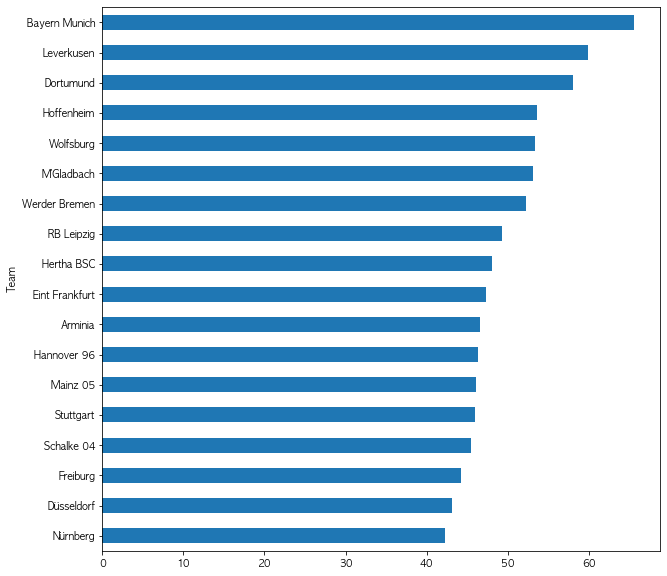

In [69]:
makeBarh(bundese1819['Possession'])

Enter the xlabel : 점유율
Enter the ylabel : 1/3 지역 터치 횟수


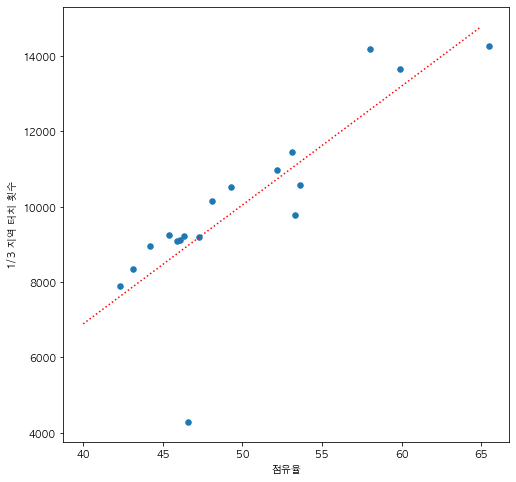

In [70]:
LastGraph(bundese1819['Possession'],bundese1819['Touches in Attacking 1/3 area'])

이 값은 ``점유율``과는 전혀 상관없다는 결과를 얻었다.

Enter the xlabel : 점유율
Enter the ylabel : 페널티 지역 터치 횟수


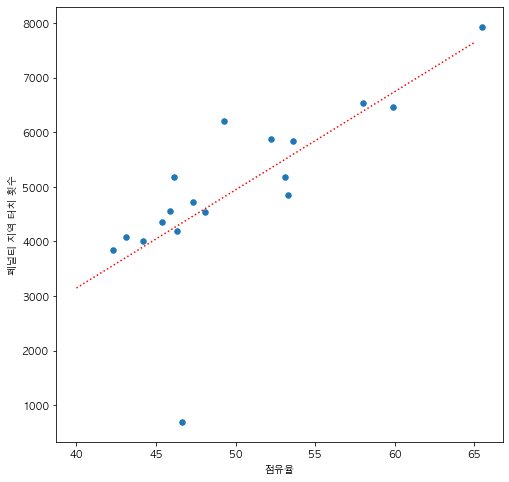

In [79]:
LastGraph(bundese1819['Possession'],bundese1819['Touches in Attacking Penalty area'])

이 값은 ``점유율``과는 전혀 상관없다는 결과를 얻었다.

Enter the xlabel : 점유율
Enter the ylabel : 총 슈팅 횟수


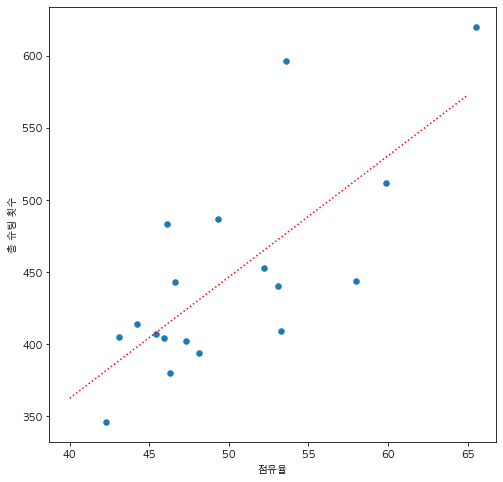

In [80]:
LastGraph(bundese1819['Possession'],bundese1819['Shots Total'])

이 값은 전혀 상관이 없다는 것은 아니지만 ``점유율``과 높은 관계성을 가지는 것은 아닌 것 같다.

Enter the xlabel : 점유율
Enter the ylabel : 총 득점


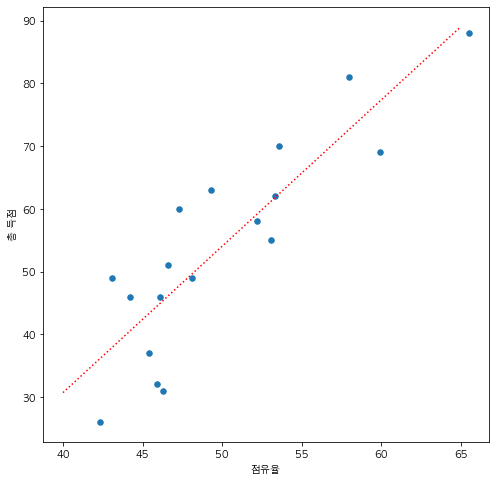

In [81]:
LastGraph(bundese1819['Possession'],bundese1819['All Goals For'])

이 값도 전혀 상관이 없다.

Enter the xlabel : 점유율
Enter the ylabel : 총 실점


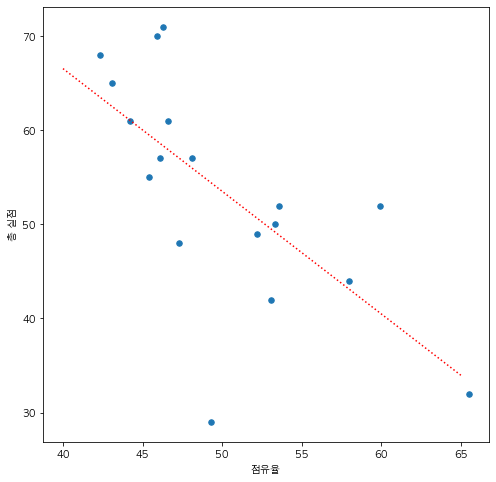

In [82]:
LastGraph(bundese1819['Possession'],bundese1819['All Goals Against'])

이 값은 상관이 있다고 할 수 있다.<br>
왜나하면 ``점유율``이 낮을수록 평균이상으로 ``실점``하는 팀이 많고 <br>
``점유율``이 높을수록 평균이하로 ``실점``하는 팀이 적기 때문이다.

Enter the xlabel : 점유율
Enter the ylabel : 예상 득점


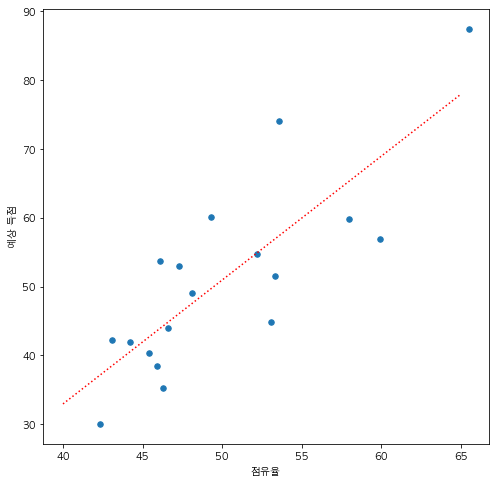

In [71]:
LastGraph(bundese1819['Possession'],bundese1819['Expected Goals For (xG)'])

이 값은 전혀 상관이 없다는 것은 아니지만 ``점유율``과 높은 관계성을 가지는 것은 아닌 것 같다.

Enter the xlabel : 점유율
Enter the ylabel : 예상 실점


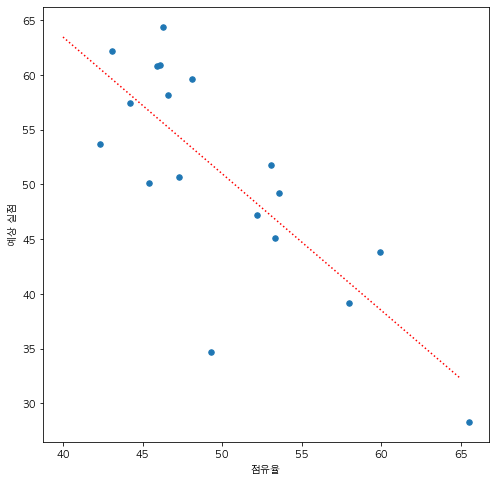

In [72]:
LastGraph(bundese1819['Possession'],bundese1819['Expected Goals Against (xGA)'])

이 값은 높은 상관이 있다고 할 수 있다.<br>
왜나하면 ``점유율``이 낮을수록 평균이상으로 ``예상 실점``값이 높은 팀이 많고 <br>
``점유율``이 높을수록 평균이하로 ``예상 실점``값이 작은 팀이 적기 때문이다.

Enter the xlabel : 점유율
Enter the ylabel : 예상 점수


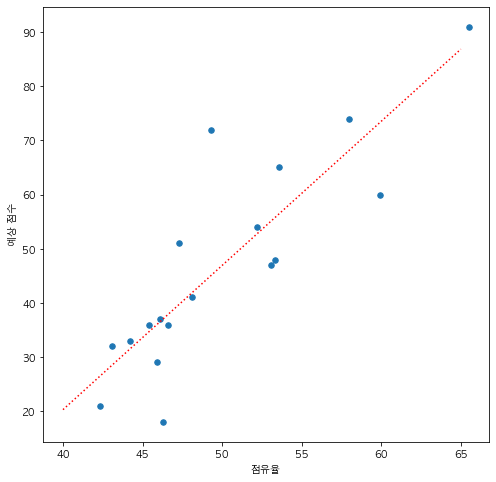

In [73]:
LastGraph(bundese1819['Possession'],bundese1819['xG Pts'])

이 값은 점유율과 높은 상관관계가 있다고 보여진다.<br>
왜냐하면 ``점유율``이 낮은 팀들은 ``예상점수``가 대부분 평균에 머무르는 반면,<br>
``점유율``이 높은 팀들은 ``예상점수``가 대부분 평균 이상에 위치해있기 때문이다.

Enter the xlabel : 점유율
Enter the ylabel : 실제 점수


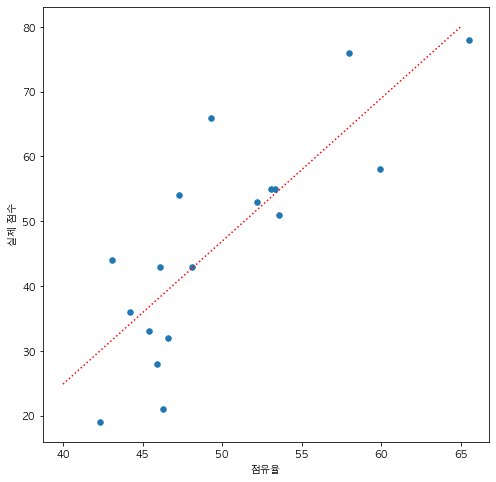

In [74]:
LastGraph(bundese1819['Possession'],bundese1819['Real Points'])

이 값은 관계성이 전혀없다고 하기에는 그렇지만 높은 관계성을 가지고 있지 않은 것 같다.

Enter the xlabel : 점유율
Enter the ylabel : 승리 횟수


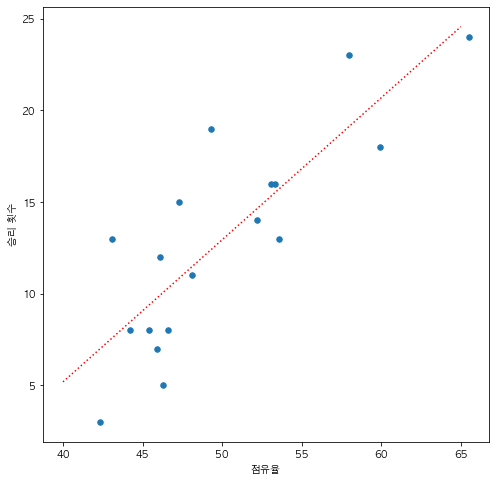

In [75]:
LastGraph(bundese1819['Possession'],bundese1819['Number of Wins'])

이 값은 높은 관계성을 띈다고 볼 수 있다.<br>
왜냐하면 ``점유율``이 낮은 팀들은 ``승리 횟수``가 평균이하에 많이 분포되어있는 반면 ,<br>
``점유율``이 높은 팀들은 평균 이상에 많이 분포가 되어있는 것을 알 수 있기 때문이다.

Enter the xlabel : 점유율
Enter the ylabel : 패배 횟수


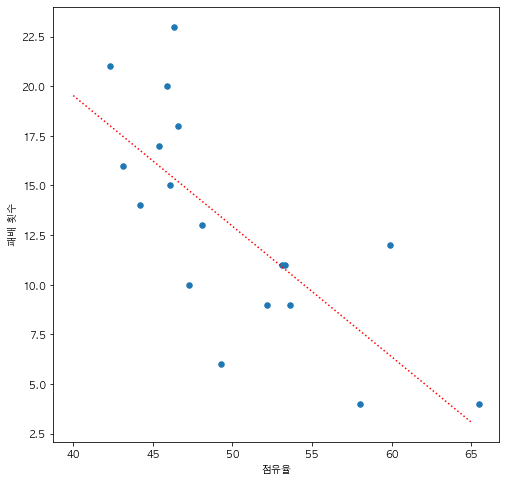

In [76]:
LastGraph(bundese1819['Possession'],bundese1819['Number of Loses'])

이 값도 높은 관계성을 가지는 것 같다.<br>
왜냐하면 ``점유율``이 낮은 팀들은 ``패배 횟수``가 평균 이상에 대부분 분포해있는 반면,<br>
``점유율``이 높은 팀들은 ``패배 횟수``가 평균 이하에 많이 분포해있기 때문이다.

<b>분데스리가 결과 정리<b>

``LaLiga``와는 다르게 ``Bundeseliga``는 ``패배 횟수``,``승리 횟수``,``예상 점수``,``예상 실점``,``총 실점``이 ``점유율``과 높은 관계성을 가지고 있고 <br>
``실제 점수``,``기대 득점``,``총 득점``,``총 슈팅 횟수``,``1/3지역 터치 횟수``,``페널티 지역 터치 횟수``는 낮은 관계성을 가지고 있다.

# 세리에 A 분석하기

In [84]:
Serie_A_18_19 = csvReader('Serie_A_18_19','../Serie A Data(csv)/Serie_A_18_19.csv')
Serie_A_18_19

,Team,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,All Goals For,All Goals Against,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses
0,Atalanta,57.8,8423,1275,642,77,46,71.3,39.3,78,69,20,9
1,Bologna,44.7,5506,820,495,48,56,48.0,49.1,41,44,11,16
2,Cagliari,50.0,5738,773,433,36,54,45.0,58.5,39,41,10,17
3,Chievo,43.1,4617,581,388,25,75,31.5,59.3,27,20,2,22
4,Empoli,47.9,6218,926,454,51,70,48.7,64.6,39,38,10,20
5,Fiorentina,50.7,5638,937,577,47,45,51.1,39.5,66,41,8,13
6,Frosinone,41.1,4402,596,436,29,69,34.9,59.2,29,25,5,23
7,Genoa,43.1,5797,877,526,39,57,45.1,52.6,44,38,8,16
8,Inter Milan,59.6,7807,1135,617,57,33,61.0,34.4,88,69,20,9
9,Juventus,56.2,7438,1045,599,70,30,62.0,32.5,84,90,28,4


In [85]:
serie1819 = Serie_A_18_19[:]

In [86]:
serie1819.set_index('Team', inplace = True)
serie1819

,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,All Goals For,All Goals Against,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses
Team,,,,,,,,,,,,
Atalanta,57.8,8423,1275,642,77,46,71.3,39.3,78,69,20,9
Bologna,44.7,5506,820,495,48,56,48.0,49.1,41,44,11,16
Cagliari,50.0,5738,773,433,36,54,45.0,58.5,39,41,10,17
Chievo,43.1,4617,581,388,25,75,31.5,59.3,27,20,2,22
Empoli,47.9,6218,926,454,51,70,48.7,64.6,39,38,10,20
Fiorentina,50.7,5638,937,577,47,45,51.1,39.5,66,41,8,13
Frosinone,41.1,4402,596,436,29,69,34.9,59.2,29,25,5,23
Genoa,43.1,5797,877,526,39,57,45.1,52.6,44,38,8,16
Inter Milan,59.6,7807,1135,617,57,33,61.0,34.4,88,69,20,9


In [87]:
print(corrcoef(serie1819['Possession'],serie1819['Touches in Attacking 1/3 area']))
print(corrcoef(serie1819['Possession'],serie1819['Touches in Attacking Penalty area']))
print(corrcoef(serie1819['Possession'],serie1819['Shots Total']))
print(corrcoef(serie1819['Possession'],serie1819['All Goals For']))
print(corrcoef(serie1819['Possession'],serie1819['All Goals Against']))
print(corrcoef(serie1819['Possession'],serie1819['Expected Goals For (xG)']))
print(corrcoef(serie1819['Possession'],serie1819['Expected Goals Against (xGA)']))
print(corrcoef(serie1819['Possession'],serie1819['xG Pts']))
print(corrcoef(serie1819['Possession'],serie1819['Real Points']))
print(corrcoef(serie1819['Possession'],serie1819['Number of Wins']))
print(corrcoef(serie1819['Possession'],serie1819['Number of Loses']))

[0.9008157847983856, '강한 상관관계']
[0.775525323753502, '강한 상관관계']
[0.7789219159375121, '강한 상관관계']
[0.8064184025947124, '강한 상관관계']
[0.7265822530264087, '강한 상관관계']
[0.8121608399367225, '강한 상관관계']
[0.8040654882721396, '강한 상관관계']
[0.8832429245122053, '강한 상관관계']
[0.7717106367502935, '강한 상관관계']
[0.7550016783145689, '강한 상관관계']
[0.6975350410530834, '뚜렷한 상관관계']


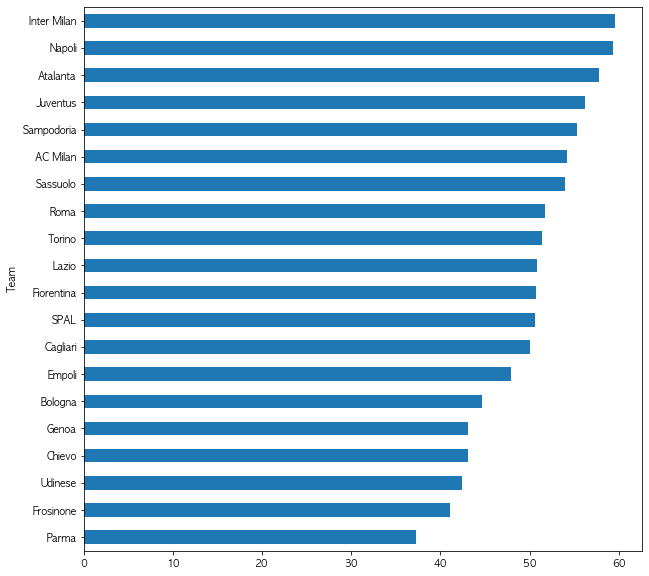

In [88]:
makeBarh(serie1819['Possession'])

Enter the xlabel : 점유율
Enter the ylabel : 1/3 지역 터치 횟수


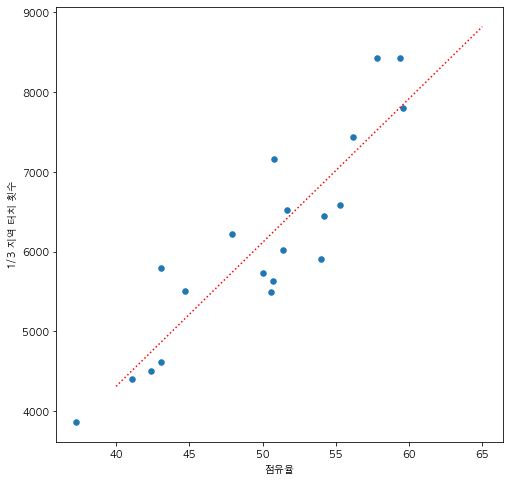

In [89]:
LastGraph(serie1819['Possession'],serie1819['Touches in Attacking 1/3 area'])

Enter the xlabel : 점유율
Enter the ylabel : 페널티 지역 터치 횟수


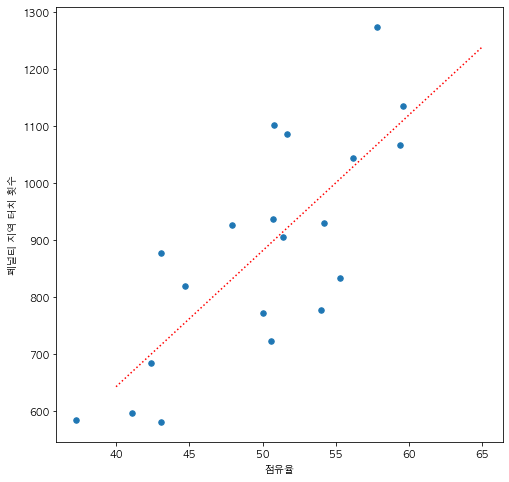

In [90]:
LastGraph(serie1819['Possession'],serie1819['Touches in Attacking Penalty area'])

Enter the xlabel : 점유율
Enter the ylabel : 총 슈팅 횟수


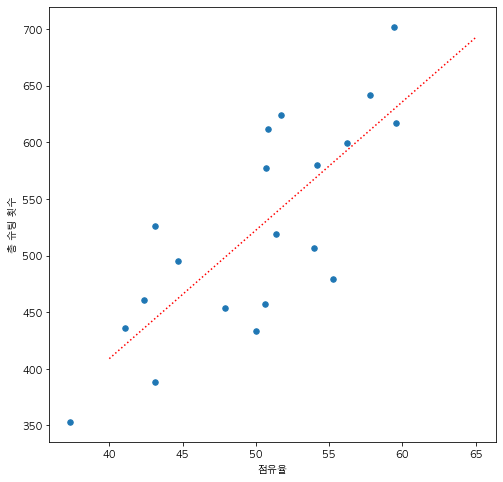

In [91]:
LastGraph(serie1819['Possession'],serie1819['Shots Total'])

Enter the xlabel : 점유율
Enter the ylabel : 총 득점


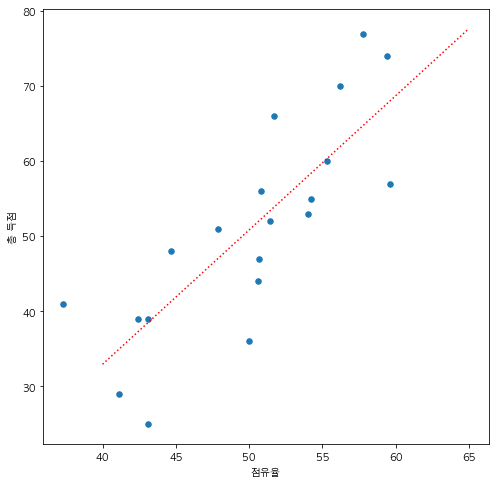

In [92]:
LastGraph(serie1819['Possession'],serie1819['All Goals For'])

Enter the xlabel : 점유율
Enter the ylabel : 총 실점


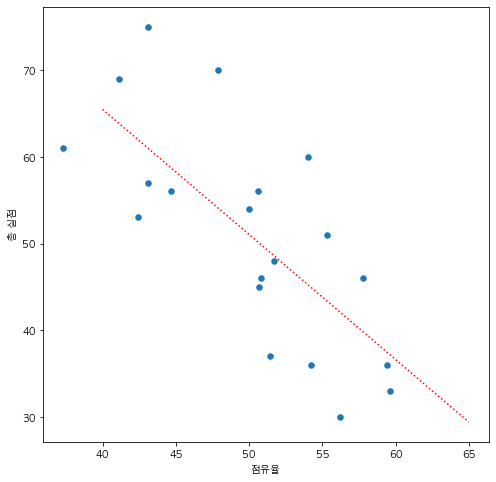

In [93]:
LastGraph(serie1819['Possession'],serie1819['All Goals Against'])

Enter the xlabel : 점유율
Enter the ylabel : 기대 득점


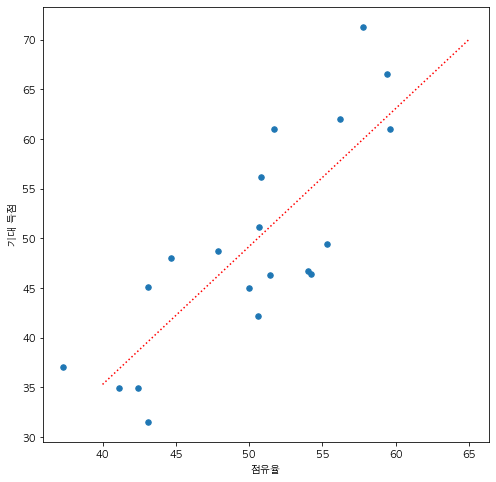

In [94]:
LastGraph(serie1819['Possession'],serie1819['Expected Goals For (xG)'])

Enter the xlabel : 점유율
Enter the ylabel : 기대 실점


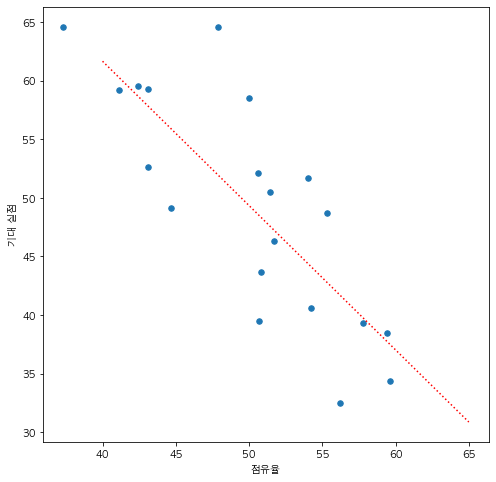

In [95]:
LastGraph(serie1819['Possession'],serie1819['Expected Goals Against (xGA)'])

Enter the xlabel : 점유율
Enter the ylabel : 기대 점수


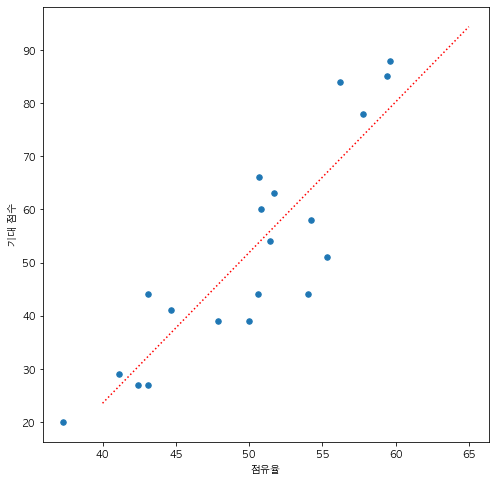

In [96]:
LastGraph(serie1819['Possession'],serie1819['xG Pts'])

Enter the xlabel : 점유율
Enter the ylabel : 실제 점수


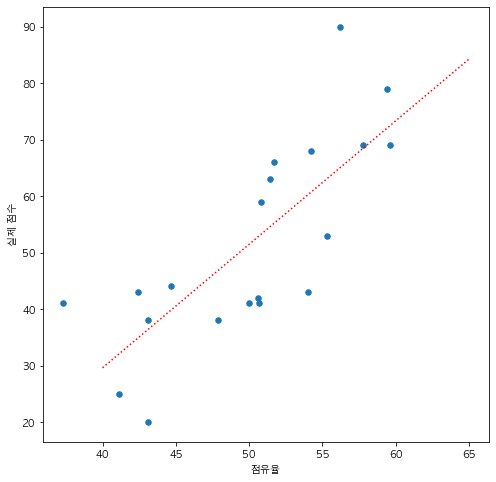

In [97]:
LastGraph(serie1819['Possession'],serie1819['Real Points'])

Enter the xlabel : 점유율
Enter the ylabel : 승리 횟수


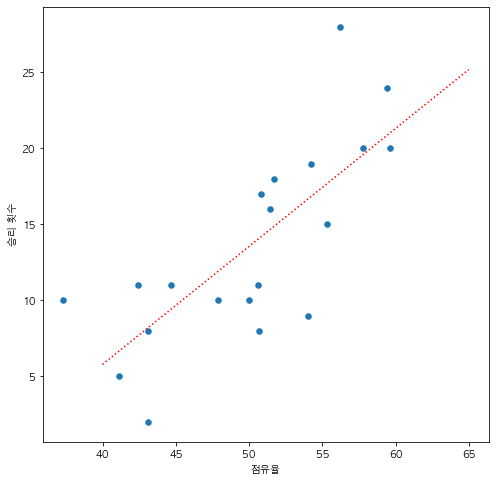

In [98]:
LastGraph(serie1819['Possession'],serie1819['Number of Wins'])

Enter the xlabel : 점유율
Enter the ylabel : 패배 횟수


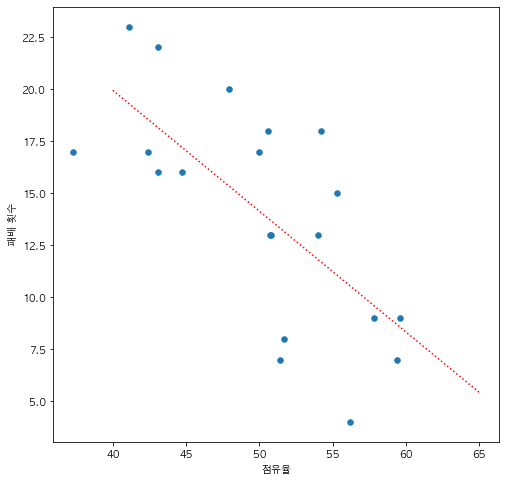

In [99]:
LastGraph(serie1819['Possession'],serie1819['Number of Loses'])

``Serie A``는 ``총 실점``,``기대 실점``,``실제 점수``,``승리 횟수``,``패배 횟수``가 ``점유율``과 높은 관계성을 가지고 있고 <br>
``1/3 지역 터치 횟수``,``페널티 지역 터치 횟수``,``총 슈팅 횟수``,``총 득점``,``기대 득점``,``기대 점수``는 낮은 관계성을 가지고 있다.

# 프리미어리그 분석하기

In [7]:
EPL_18_19 = csvReader('EPL_18_19','../EPL_data(csv)/EPL_18_19.csv')
EPL_18_19

,Team,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,All Goals For,All Goals Against,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses
0,Arsenal,58.0,6862,1112,467,73,51,62.1,50.8,69,70,21,7
1,Bournemouth,46.8,5644,948,439,56,70,48.8,55.5,46,45,13,6
2,Brighton,42.6,4818,660,364,35,60,36.1,62.1,25,36,9,9
3,Burnley,41.2,4771,701,358,45,68,42.8,62.9,39,40,11,7
4,Cardiff City,35.6,4656,742,416,34,69,39.4,61.6,30,34,10,4
5,Chelsea,62.8,9458,1183,600,63,39,58.0,35.4,82,72,21,9
6,Crystal Palace,45.0,5766,1008,487,51,53,50.5,48.4,54,49,14,7
7,Everton,51.5,6341,938,491,54,46,48.0,42.6,57,54,15,9
8,Fullham,48.6,5322,673,444,34,81,36.3,69.0,17,26,7,5
9,Huddersfield,47.0,5728,686,395,22,76,31.7,62.6,26,16,3,7


In [8]:
epl1819 = EPL_18_19[:]
epl1819.set_index('Team' , inplace = True)

In [9]:
epl1819

,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,All Goals For,All Goals Against,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins,Number of Loses
Team,,,,,,,,,,,,
Arsenal,58.0,6862,1112,467,73,51,62.1,50.8,69,70,21,7
Bournemouth,46.8,5644,948,439,56,70,48.8,55.5,46,45,13,6
Brighton,42.6,4818,660,364,35,60,36.1,62.1,25,36,9,9
Burnley,41.2,4771,701,358,45,68,42.8,62.9,39,40,11,7
Cardiff City,35.6,4656,742,416,34,69,39.4,61.6,30,34,10,4
Chelsea,62.8,9458,1183,600,63,39,58.0,35.4,82,72,21,9
Crystal Palace,45.0,5766,1008,487,51,53,50.5,48.4,54,49,14,7
Everton,51.5,6341,938,491,54,46,48.0,42.6,57,54,15,9
Fullham,48.6,5322,673,444,34,81,36.3,69.0,17,26,7,5


In [10]:
print(corrcoef(epl1819['Possession'],epl1819['Touches in Attacking 1/3 area']))
print(corrcoef(epl1819['Possession'],epl1819['Touches in Attacking Penalty area']))
print(corrcoef(epl1819['Possession'],epl1819['Shots Total']))
print(corrcoef(epl1819['Possession'],epl1819['All Goals For']))
print(corrcoef(epl1819['Possession'],epl1819['All Goals Against']))
print(corrcoef(epl1819['Possession'],epl1819['Expected Goals For (xG)']))
print(corrcoef(epl1819['Possession'],epl1819['Expected Goals Against (xGA)']))
print(corrcoef(epl1819['Possession'],epl1819['xG Pts']))
print(corrcoef(epl1819['Possession'],epl1819['Real Points']))
print(corrcoef(epl1819['Possession'],epl1819['Number of Wins']))
print(corrcoef(epl1819['Possession'],epl1819['Number of Loses']))

[0.9337695821113912, '강한 상관관계']
[0.8619681229309395, '강한 상관관계']
[0.8564855542182263, '강한 상관관계']
[0.8419833059170908, '강한 상관관계']
[0.7330834876601405, '강한 상관관계']
[0.8436980065436462, '강한 상관관계']
[0.774709604874502, '강한 상관관계']
[0.8465691977616089, '강한 상관관계']
[0.8364477866275486, '강한 상관관계']
[0.8427179823430072, '강한 상관관계']
[0.2999887783307933, '약한 상관관계']


여기서 ``Number of Loses``는 약한 상관관계를 가지므로 삭제하다록 하겠다.

In [11]:
del epl1819['Number of Loses']

In [13]:
epl1819

,Possession,Touches in Attacking 1/3 area,Touches in Attacking Penalty area,Shots Total,All Goals For,All Goals Against,Expected Goals For (xG),Expected Goals Against (xGA),xG Pts,Real Points,Number of Wins
Team,,,,,,,,,,,
Arsenal,58.0,6862,1112,467,73,51,62.1,50.8,69,70,21
Bournemouth,46.8,5644,948,439,56,70,48.8,55.5,46,45,13
Brighton,42.6,4818,660,364,35,60,36.1,62.1,25,36,9
Burnley,41.2,4771,701,358,45,68,42.8,62.9,39,40,11
Cardiff City,35.6,4656,742,416,34,69,39.4,61.6,30,34,10
Chelsea,62.8,9458,1183,600,63,39,58.0,35.4,82,72,21
Crystal Palace,45.0,5766,1008,487,51,53,50.5,48.4,54,49,14
Everton,51.5,6341,938,491,54,46,48.0,42.6,57,54,15
Fullham,48.6,5322,673,444,34,81,36.3,69.0,17,26,7


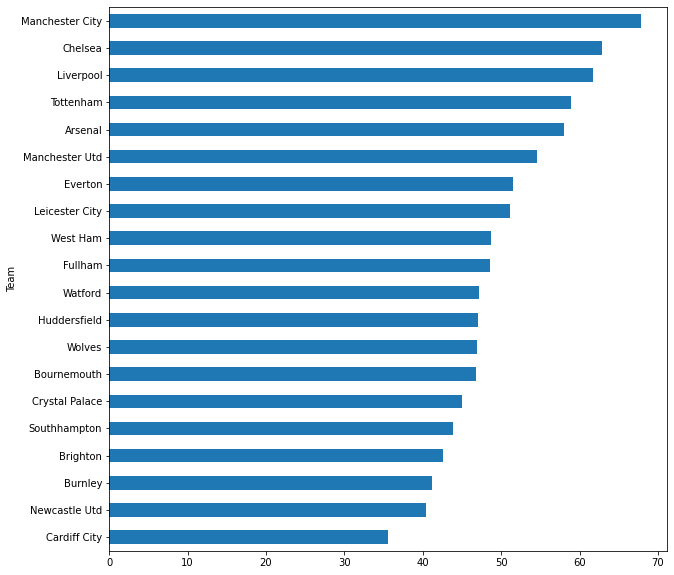

In [14]:
makeBarh(epl1819['Possession'])

Enter the xlabel : 점유율
Enter the ylabel : 1/3 지역 터치 횟수


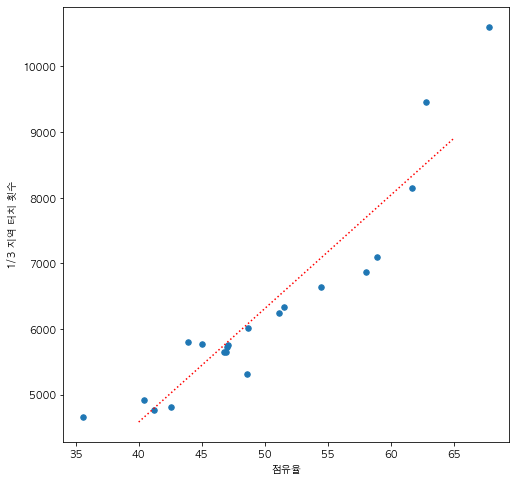

In [15]:
LastGraph(epl1819['Possession'],epl1819['Touches in Attacking 1/3 area'])

Enter the xlabel : 점유율
Enter the ylabel : 페널티 지역 터치 횟수


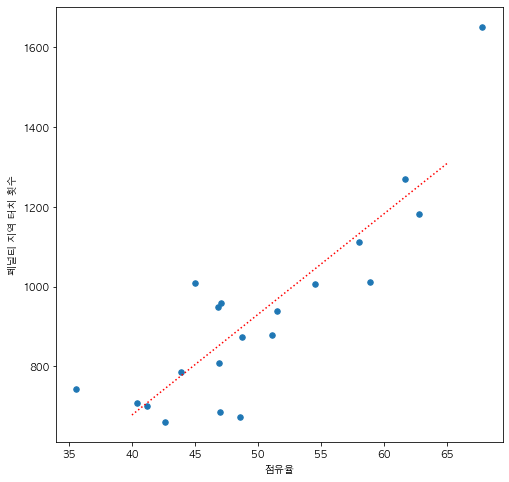

In [16]:
LastGraph(epl1819['Possession'],epl1819['Touches in Attacking Penalty area'])

Enter the xlabel : 점유율
Enter the ylabel : 총 슈팅 횟수


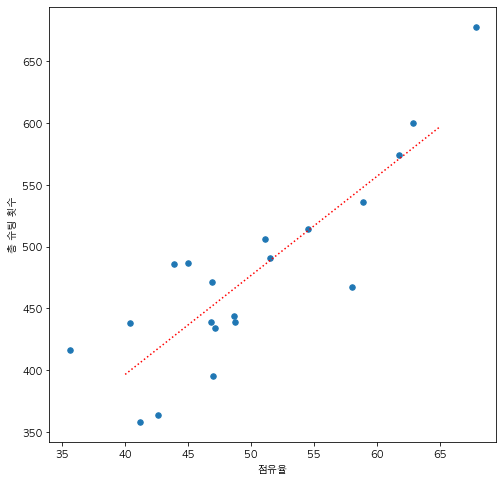

In [17]:
LastGraph(epl1819['Possession'],epl1819['Shots Total'])

Enter the xlabel : 점유율
Enter the ylabel : 총 득점


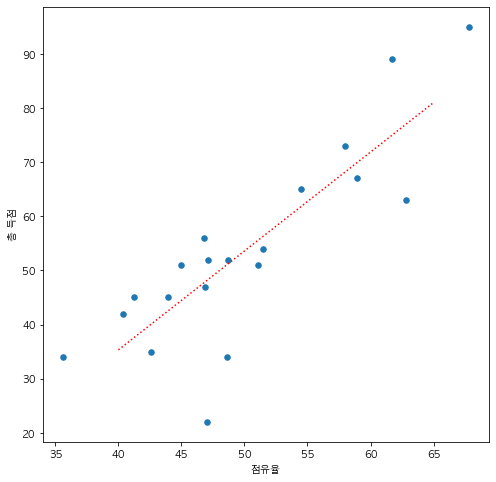

In [18]:
LastGraph(epl1819['Possession'],epl1819['All Goals For'])

Enter the xlabel : 점유율
Enter the ylabel : 총 실점


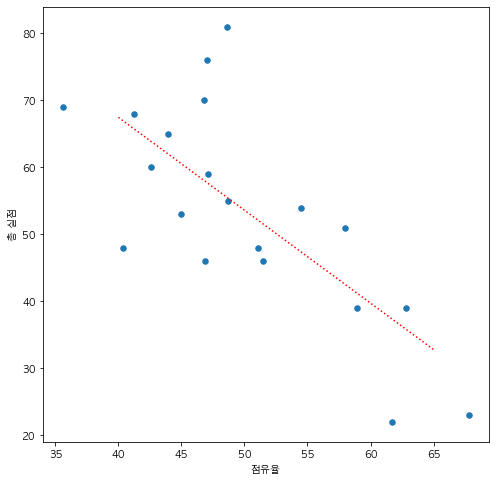

In [19]:
LastGraph(epl1819['Possession'],epl1819['All Goals Against'])

Enter the xlabel : 점유율
Enter the ylabel : 기대 득점


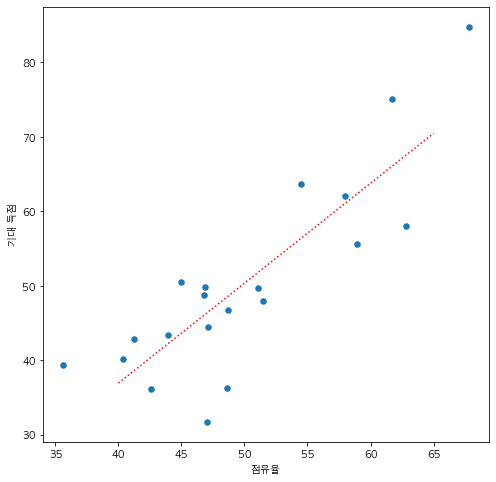

In [20]:
LastGraph(epl1819['Possession'],epl1819['Expected Goals For (xG)'])

Enter the xlabel : 점유율
Enter the ylabel : 기대 실점


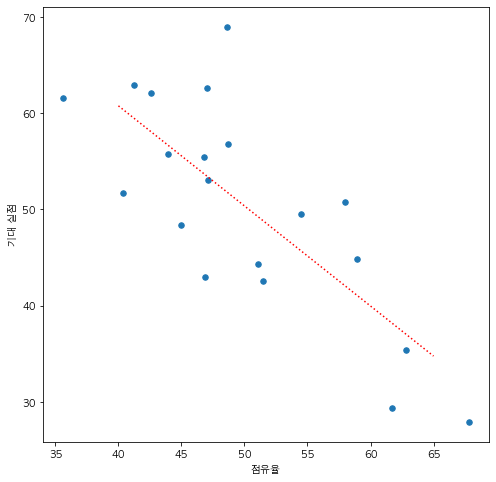

In [21]:
LastGraph(epl1819['Possession'],epl1819['Expected Goals Against (xGA)'])

Enter the xlabel : 점유율
Enter the ylabel : 기대 점수


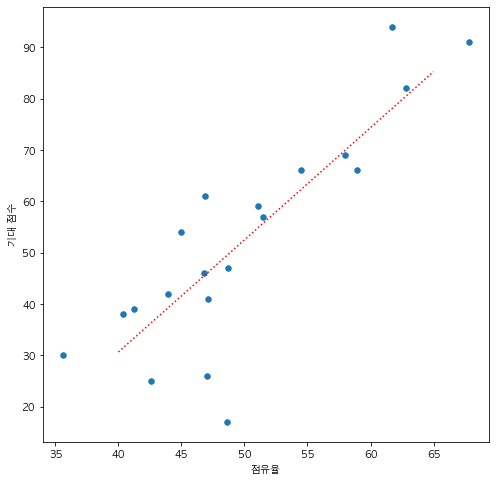

In [22]:
LastGraph(epl1819['Possession'],epl1819['xG Pts'])

Enter the xlabel : 점유율
Enter the ylabel : 실제 점수


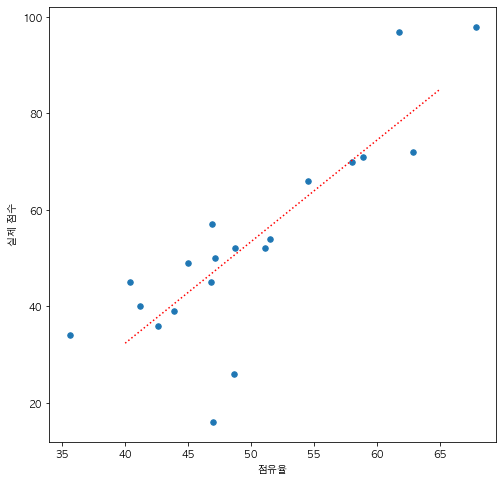

In [23]:
LastGraph(epl1819['Possession'],epl1819['Real Points'])

Enter the xlabel : 점유율
Enter the ylabel : 승리 횟수


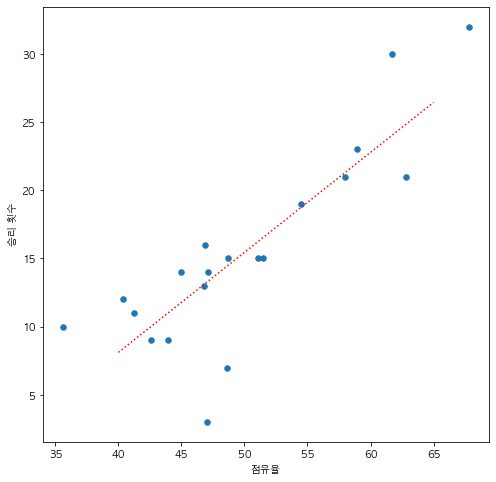

In [24]:
LastGraph(epl1819['Possession'],epl1819['Number of Wins'])

``EPL``은 ``총 슈팅횟수``,``총 실점``,``기대 실점``이 ``점유율``과 높은 관계성을 가지고 있고 <br>
``1/3 지역 터치 횟수``,``페널티 지역 터치 횟수``,``총 득점``,``총 득점``,``기대 득점``,``기대 점수``,``실제 점수``,``승리 횟수``는 낮은 관계성을 가지고 있다.

# 리그 총합 결과

In [33]:
def HighRelationship() :
    from matplotlib import rc
    rc('font',family = 'AppleGothic')
    x = str(input('Enter the High relationship : '))
    y = str(input('Enter the High relationship : '))
    z = str(input('Enter the High relationship : '))
    w = str(input('Enter the High relationship : '))
    a = str(input('Enter the High relationship : '))
    b = str(input('Enter the High relationship : '))
    c = str(input('Enter the High relationship : '))
    d = str(input('Enter the High relationship : '))
    e = str(input('Enter the High relationship : '))
    List = [x,y,z,w,a,b,c,d,e]
    return List

def LowRelationship() :
    from matplotlib import rc
    rc('font',family = 'AppleGothic')
    x = str(input('Enter the Low relationship : '))
    y = str(input('Enter the Low relationship : '))
    z = str(input('Enter the Low relationship : '))
    w = str(input('Enter the Low relationship : '))
    a = str(input('Enter the Low relationship : '))
    b = str(input('Enter the Low relationship : '))
    c = str(input('Enter the Low relationship : '))
    d = str(input('Enter the Low relationship : '))
    e = str(input('Enter the Low relationship : '))
    List = [x,y,z,w,a,b,c,d,e]
    return List

In [35]:
eplHigh = HighRelationship()

Enter the High relationship : Shots Total
Enter the High relationship : xGA
Enter the High relationship : All Goals Against
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 


In [44]:
eplHigh

['Shots Total', 'xGA', 'All Goals Against', '', '', '', '', '', '']

In [36]:
eplLow = LowRelationship()

Enter the Low relationship : Touches in Attacking 1/3 area
Enter the Low relationship : Touches in Attacking Penalty area
Enter the Low relationship : All Goals For
Enter the Low relationship : xG
Enter the Low relationship : xG Pts
Enter the Low relationship : Real Points
Enter the Low relationship : Number of Wins
Enter the Low relationship : 
Enter the Low relationship : 


In [45]:
eplLow

['Touches in Attacking 1/3 area',
 'Touches in Attacking Penalty area',
 'All Goals For',
 'xG',
 'xG Pts',
 'Real Points',
 'Number of Wins',
 '',
 '']

In [37]:
laligaHigh = HighRelationship()

Enter the High relationship : Number of Wins
Enter the High relationship : Shots Total
Enter the High relationship : Touches in Attacking Penalty area
Enter the High relationship : Touches in Attacking 1/3 area
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 


In [46]:
laligaHigh

['Number of Wins',
 'Shots Total',
 'Touches in Attacking Penalty area',
 'Touches in Attacking 1/3 area',
 '',
 '',
 '',
 '',
 '']

In [38]:
laligaLow = LowRelationship()

Enter the Low relationship : Real Points
Enter the Low relationship : xG Pts
Enter the Low relationship : xG
Enter the Low relationship : 
Enter the Low relationship : 
Enter the Low relationship : 
Enter the Low relationship : 
Enter the Low relationship : 
Enter the Low relationship : 


In [47]:
laligaLow

['Real Points', 'xG Pts', 'xG', '', '', '', '', '', '']

In [40]:
serieHigh = HighRelationship()

Enter the High relationship : All Goals Against
Enter the High relationship : Real Points
Enter the High relationship : Number of Wins
Enter the High relationship : Number of Loses
Enter the High relationship : xGA
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 


In [48]:
serieHigh

['All Goals Against',
 'Real Points',
 'Number of Wins',
 'Number of Loses',
 'xGA',
 '',
 '',
 '',
 '']

In [49]:
serieLow = LowRelationship()

Enter the Low relationship : Touches in Attacking 1/3 area
Enter the Low relationship : Touches in Attacking Penalty area
Enter the Low relationship : Shots Total
Enter the Low relationship : All Goals For
Enter the Low relationship : xG
Enter the Low relationship : xG Pts
Enter the Low relationship : 
Enter the Low relationship : 
Enter the Low relationship : 


In [50]:
serieLow

['Touches in Attacking 1/3 area',
 'Touches in Attacking Penalty area',
 'Shots Total',
 'All Goals For',
 'xG',
 'xG Pts',
 '',
 '',
 '']

In [42]:
bundeseHigh = HighRelationship()

Enter the High relationship : Number of Loses
Enter the High relationship : Number of Wins
Enter the High relationship : xG Pts
Enter the High relationship : xGA
Enter the High relationship : All Goals Against
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 
Enter the High relationship : 


In [51]:
bundeseHigh

['Number of Loses',
 'Number of Wins',
 'xG Pts',
 'xGA',
 'All Goals Against',
 '',
 '',
 '',
 '']

In [43]:
bundeseLow = LowRelationship()

Enter the Low relationship : Real Points
Enter the Low relationship : xG
Enter the Low relationship : All Goals For
Enter the Low relationship : Shots Total
Enter the Low relationship : Touches in Attacking 1/3 area
Enter the Low relationship : Touches in Attacking Penalty area
Enter the Low relationship : 
Enter the Low relationship : 
Enter the Low relationship : 


In [52]:
bundeseLow

['Real Points',
 'xG',
 'All Goals For',
 'Shots Total',
 'Touches in Attacking 1/3 area',
 'Touches in Attacking Penalty area',
 '',
 '',
 '']

In [61]:
import pandas as pd
Table1 = pd.DataFrame({'eplHigh' : [eplHigh[0],eplHigh[1],eplHigh[2],eplHigh[3],eplHigh[4]],\
                     'serieHigh' : [serieHigh[0],serieHigh[1],serieHigh[2],serieHigh[3],serieHigh[4]],\
                     'laligaHigh' : [laligaHigh[0],laligaHigh[1],laligaHigh[2],laligaHigh[3],laligaHigh[4]],\
                      'bundeseHigh' : [bundeseHigh[0],bundeseHigh[1],bundeseHigh[2],bundeseHigh[3],\
                       bundeseHigh[4]]},\
                     index = [0,1,2,3,4])
Table1

,eplHigh,serieHigh,laligaHigh,bundeseHigh
0,Shots Total,All Goals Against,Number of Wins,Number of Loses
1,xGA,Real Points,Shots Total,Number of Wins
2,All Goals Against,Number of Wins,Touches in Attacking Penalty area,xG Pts
3,,Number of Loses,Touches in Attacking 1/3 area,xGA
4,,xGA,,All Goals Against


여기서 알 수 있는 점은 공통적으로 세개가 최대로 겹치는데 ``xGA``,``All Goals Against``,``Number of Wins``가 겹친다

In [63]:
Table2 = pd.DataFrame({'eplLow' : [eplLow[0],eplLow[1],eplLow[2],eplLow[3],eplLow[4],eplLow[5],eplLow[6]],\
                     'serieLow' : [serieLow[0],serieLow[1],serieLow[2],serieLow[3],serieLow[4],serieLow[5],serieLow[6]],\
                     'laligaLow' : [laligaLow[0],laligaLow[1],laligaLow[2],laligaLow[3],laligaLow[4],laligaLow[5],laligaLow[6]],\
                      'bundeseLow' : [bundeseLow[0],bundeseLow[1],bundeseLow[2],bundeseLow[3],\
                       bundeseLow[4],bundeseLow[5],bundeseLow[6]]},\
                     index = [0,1,2,3,4,5,6])
Table2

,eplLow,serieLow,laligaLow,bundeseLow
0,Touches in Attacking 1/3 area,Touches in Attacking 1/3 area,Real Points,Real Points
1,Touches in Attacking Penalty area,Touches in Attacking Penalty area,xG Pts,xG
2,All Goals For,Shots Total,xG,All Goals For
3,xG,All Goals For,,Shots Total
4,xG Pts,xG,,Touches in Attacking 1/3 area
5,Real Points,xG Pts,,Touches in Attacking Penalty area
6,Number of Wins,,,


여기서 4개가 겹치는 것은 ``xG``이고 3개가 겹치는 것은 ``xG Pts``,``Real Points``이다.

따라서 최대로 점유율과 관계성을 가지는 것은 ``xGA``, ``All Goals Against``, ``Number of Wins``이고, <br>
가장 관계성을 낮게 가지는 것은 ``xG``이다.

처음 가설 설정을 ``점유율이 높을수록 공격성과 승리할 확률이 높다.``로 설정했는데 하나는 결론을 내릴 수 있게 되었다.<br>
공격성은 ``xG``,``Àll Goals For``,``Shots Total``등으로 설명할 수 있는데 여기서 확인한 결과로서는 관련성이 낮거나 없는 경우이다.<br>
따라서 ``점유율이 높을수록 공격성이 높다.``는 틀렸다고 결론을 내리겠다.

# 점유율과 승리확률 관계성 증명

승리확률을 구하는 방법은 총 3가지이다. <br>
설명하기 위해 각각 공식마다 변수를 설정하겠다.<br>
``승률`` = $WR$ ``(Win Rate)``<br>
``경기 수`` = $MP$ ``(Matches Played)``<br>
``승리 수`` = $W$ ``(Wins)``<br>
``패배 수`` = $L$ ``(Loses)``<br>
``무승부 수`` = $D$ ``(Draws)``<br>
첫번째는 직관적으로 관찰할 수 있다.<br>

$$ WR = \frac{W}{MP} \times 100 $$

두번째는 ``한국프로축구연맹``에서 지정한 승률 계산방법이다.

$$ WR = \frac{W + D \times 0.5}{MP} \times 100 $$

마지막 방법은 설명해야할 것이 많다.<br>
야구에서 승률을 계산하는 방법이 있는데 이를 ``피타고리안 승률 방정식(Pythagorean Theorem of Baseball Formula)``라고 한다.<br>
이 계산식은 다음과 같다.

``승률`` = $WR$ ``(Win Rate)``<br>
``득점`` = $GF$ ``(Goals For)``<br>
``실점`` = $GA$ ``(Goals Against)``<br>
$$ W = \frac{GF^2}{GF^2 + GA^2} $$

https://hhamilton.typepad.com/files/pythag_mit_sa_2010.pdf

하지만 위의 있는 ``HOWARD H. HAMILTON``가 쓴 논문을 보면 이 공식은 축구에 적용하면 강팀의 승률은 과대평가되고<br>
약한 팀의 승률은 과소평가된다는 오류가 있다.

https://pena.lt/y/2012/11/26/applying-the-pythagorean-expectation-to-football-part-one/ -> <b>Part 1<b> <br>
https://pena.lt/y/2012/12/03/applying-the-pythagorean-expectation-to-football-part-two/ -> <b>Part 2<b>

논문의 식을 사용하기에는 내가 이해하지 못하는 것이 많기 때문에 ``Martin Eastwood``가 ``피타고리안 승률 방정식``을 이용해 만든<br>
``MPE 방정식``을 사용하도록 하겠다.

``MPE 방정식``의 식은 다음과 같다. <br>

``예상 점수`` = $xG Pts$ <br>
``득점`` = $GF$ ``(Goals For)``<br>
``실점`` = $GA$ ``(Goals Against)``<br>
``총 게임수`` = $MP$ ``(Matches Played)``<br>

$$ xG Pts = \frac{GF^{1.122777}}{GF^{1.072388} + GA^{1.127248}} \times 2.499973 \times MP $$

따라서 지금부터 직접적으로 ``점유율``과의 관계성을 파악하기 위해서 승률은 <br>
가장 정확한 ``MPE 방정식``으로 계산하도록 하겠다.

또한 ``예상 승점``이 높다는 것은 ``승률``이 높다는 것을 전제로 하고 진행하겠다.

In [35]:
def firstWR(x,y) :
    """(float,float) -> float
    x = Number of Wins
    y = Matches Played
    Return the Win Rate
    """
    W = (x/y) * 100
    return W

In [34]:
def secondWR(x,y,z) : 
    """(float,float,float) -> float
    x = Number of Wins
    y = Number of Loses
    z = Matches Played
    Return the Win Rate
    """
    W = (x + (0.5 * (z-y-x))) / z * 100
    return W

In [33]:
def thirdWR(x,y,z) :
    """(float,float,float) -> float
    x = Goals For
    y = Goals Against
    z = Matches Played
    Return the Win Rate
    """
    W = (x**1.122777 / (x**1.072388 + y**1.127248)) * 2.499973 * z
    return W

예시를 하나들어 계산해보겠다.

예시를 든 팀은 ``csv파일 epl1819``에 있는 ``Arsenal``이다.

In [9]:
firstWR(21,38)

55.26315789473685

이건 직관적 승률이다.

In [10]:
secondWR(21,7,38)

68.42105263157895

이건 한국프로축구연맹의 승률 계산법이다.

In [11]:
a = thirdWR(73,51,38)
a

63.93051216223583

``MPE 방정식``을 이용한 계산법이다. 여기서 중요한 것은 이 결과는 승률이 아닌 승점이다.<br>
따라서 위의 두개의 값들은 바로 ``점유율``과 비교해보고 <br>
이 식은 실제와의 ``오차율``을 비교해서 ``오차율``이 낮을수록 승률이 높다고 설정하고 ``점유율``과 비교하겠다.

In [32]:
def errorRate(x,y) : 
    """
    x = Real Points
    y = MPE Points
    """
    result = ((x - y) / y) * 100
    return str(result) + '%'

In [15]:
errorRate(70,a)

'9.493882705587737%'

In [51]:
def MPE(x,y,z,k) :
    W = (x**1.122777 / (x**1.072388 + y**1.127248)) * 2.499973 * z
    errorRate = ((k - W) / W ) * 100
    return [W,errorRate]

두 개의 함수를 나눠서 할 필요가 없을 것 같아서 결과를 승점과 오차율 한번에 내놓도록 함수를 새로 만들었다.

<b>점유율과 승리 확률 분석하기<b>
  

In [119]:
Laliga1819 = csvReader('laliga1819','../LaLiga_data(csv)/La_Liga_18_19_D.csv')
Laliga1819.set_index('Team', inplace = True)
Laliga1819

,Possession,All Goals For,All Goals Against,Real Points,Matches Played
Team,,,,,
Deportivo Alavés,42.7,39,50,50,38
Athletic Club,50.1,41,45,53,38
Atlético Madrid,49.4,55,29,76,38
Barcelona,64.2,90,36,87,38
Real Betis,61.7,44,52,50,38
Celta Vigo,51.7,53,62,41,38
Eibar,54.1,46,50,47,38
Espanyol,49.5,48,50,53,38
Getafe,40.8,48,35,59,38


In [52]:
Depor = MPE(39,50,38,50)
Depor

[43.64719993267229, 14.554885713464289]

In [53]:
Athletic = MPE(41,45,38,53)
Athletic

[48.50411893926902, 9.26907066667921]

In [54]:
Athletico = MPE(55,29,38,76)
Athletico

[72.40916759039494, 4.959085332837578]

In [55]:
Bar = MPE(90,36,38,87)
Bar

[81.87171201655792, 6.263809388039817]

In [56]:
Betis = MPE(44,52,38,50)
Betis


[46.24612987165405, 8.117155184150526]

In [58]:
Celta = MPE(53,62,38,41)
Celta

[46.71816069610792, -12.239695679167225]

In [62]:
Eibar = MPE(46,50,38,47)
Eibar

[48.916496142876994, -3.917893336593909]

In [63]:
Espanyol = MPE(48,50,38,53)
Espanyol

[50.313174464345714, 5.3402027684782585]

In [64]:
Getafe = MPE(48,35,38,59)
Getafe

[61.87041898534423, -4.6394044721503676]

In [65]:
Girona = MPE(37,53,38,37)
Girona

[40.2964078658391, -8.180401282451777]

In [66]:
Huesca = MPE(43,65,38,33)
Huesca

[38.81304874333133, -14.977047491869854]

In [67]:
Leganes = MPE(37,43,38,45)
Leganes

[46.624745406149785, -3.4847276741064666]

In [72]:
Levante = MPE(59,66,38,33)
Levante

[48.22614912789621, -31.57239257796909]

In [73]:
Rayo = MPE(41,70,38,32)
Rayo

[35.34824637841176, -9.47217110169469]

In [74]:
Madrid = MPE(63,46,38,68)
Madrid

[62.244824359157064, 9.24603081476327]

In [75]:
Sociedad = MPE(45,46,38,50)
Sociedad

[50.85213129248311, -1.6757041854980597]

In [76]:
Sevilla = MPE(62,47,38,59)
Sevilla

[60.987557924406275, -3.2589564036484977]

In [77]:
Valencia = MPE(51,35,38,61)
Valencia

[63.92737873916526, -4.57922535993455]

In [78]:
Valladolid = MPE(32,51,38,41)
Valladolid

[37.14807835778532, 10.369100670876046]

In [79]:
Villarreal = MPE(49,52,38,44)
Villarreal

[49.73836036457779, -11.537091939734466]

In [93]:
WR = pd.DataFrame({'Team' : ['Deportivo Alavés','Athletic Club','Atlético Madrid','Barcelona',\
                            'Real Betis','Celta Vigo','Eibar','Espanyol','Getafe','Girona',\
                            'Huesca','CD Leganés','Levante','Rayo Vallecano','Real Madrid',\
                            'Real Sociedad','Sevilla','Valencia','Real Valladolid','Villarreal'],
    'MPE Points' : [Depor[0],Athletic[0],Athletico[0],Bar[0],Betis[0],Celta[0],Eibar[0],Espanyol[0],\
                          Getafe[0],Girona[0],Huesca[0],Leganes[0],Levante[0],Rayo[0],Madrid[0],Sociedad[0],\
                          Sevilla[0],Valencia[0],Valladolid[0],Villarreal[0]],
                  'Error Rate' : [Depor[1],Athletic[1],Athletico[1],Bar[1],Betis[1],Celta[1],Eibar[1],Espanyol[1],\
                          Getafe[1],Girona[1],Huesca[1],Leganes[1],Levante[1],Rayo[1],Madrid[1],Sociedad[1],\
                          Sevilla[1],Valencia[1],Valladolid[1],Villarreal[1]]},index = [0,1,2,3,4,5,6,7,8,9,10,11,\
                                                                                       12,13,14,15,16,17,18,19])
WR

,Team,MPE Points,Error Rate
0,Deportivo Alavés,43.647200,14.554886
1,Athletic Club,48.504119,9.269071
2,Atlético Madrid,72.409168,4.959085
3,Barcelona,81.871712,6.263809
4,Real Betis,46.246130,8.117155
5,Celta Vigo,46.718161,-12.239696
6,Eibar,48.916496,-3.917893
7,Espanyol,50.313174,5.340203
8,Getafe,61.870419,-4.639404
9,Girona,40.296408,-8.180401


In [94]:
WR.set_index('Team', inplace = True)
WR

,MPE Points,Error Rate
Team,,
Deportivo Alavés,43.647200,14.554886
Athletic Club,48.504119,9.269071
Atlético Madrid,72.409168,4.959085
Barcelona,81.871712,6.263809
Real Betis,46.246130,8.117155
Celta Vigo,46.718161,-12.239696
Eibar,48.916496,-3.917893
Espanyol,50.313174,5.340203
Getafe,61.870419,-4.639404


In [120]:
Win_Rate_laliga = pd.merge(Laliga1819,WR,on = 'Team')
Win_Rate_laliga

,Possession,All Goals For,All Goals Against,Real Points,Matches Played,MPE Points,Error Rate
Team,,,,,,,
Deportivo Alavés,42.7,39,50,50,38,43.647200,14.554886
Athletic Club,50.1,41,45,53,38,48.504119,9.269071
Atlético Madrid,49.4,55,29,76,38,72.409168,4.959085
Barcelona,64.2,90,36,87,38,81.871712,6.263809
Real Betis,61.7,44,52,50,38,46.246130,8.117155
Celta Vigo,51.7,53,62,41,38,46.718161,-12.239696
Eibar,54.1,46,50,47,38,48.916496,-3.917893
Espanyol,49.5,48,50,53,38,50.313174,5.340203
Getafe,40.8,48,35,59,38,61.870419,-4.639404


Enter the xlabel : 점유율
Enter the ylabel : MPE 점수


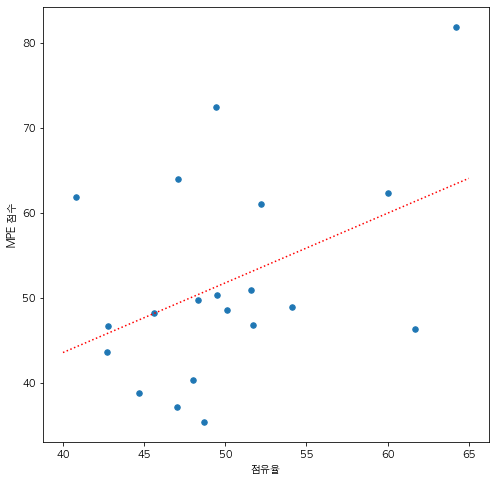

In [99]:
LastGraph(Win_Rate_laliga['Possession'],Win_Rate_laliga['MPE Points'])

Enter the xlabel : 점유율
Enter the ylabel : 오차율


/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


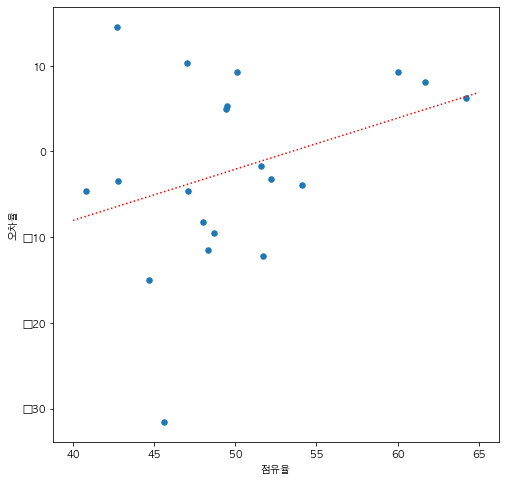

In [100]:
LastGraph(Win_Rate_laliga['Possession'],Win_Rate_laliga['Error Rate'])

이로써 알 수 있는 것은 ``점유율이 높을수록 승률이 높다``이다. <br>
다른 리그도 해서 최종결과를 내도록 하겠다.

In [121]:
Epl1819 = csvReader('epl1819','../EPL_data(csv)/EPL_18_19_D.csv')
Epl1819.set_index('Team', inplace = True)
Epl1819

,Possession,All Goals For,All Goals Against,Real Points
Team,,,,
Arsenal,58.0,73,51,70
Bournemouth,46.8,56,70,45
Brighton,42.6,35,60,36
Burnley,41.2,45,68,40
Cardiff City,35.6,34,69,34
Chelsea,62.8,63,39,72
Crystal Palace,45.0,51,53,49
Everton,51.5,54,46,54
Fullham,48.6,34,81,26


In [102]:
#참고로 EPL은 38경기를 한다.
Arsenal = MPE(73,51,38,50)
Bourne = MPE(56,70,38,45)
Brighton = MPE(35,60,38,36)
Burnley = MPE(45,68,38,40)
Cardiff = MPE(34,69,38,34)
Chelsea = MPE(63,39,38,72)
Palace = MPE(51,53,38,49)
Everton = MPE(54,46,38,54)
Fullham = MPE(34,81,38,26)
Hudders = MPE(22,76,38,16)
Leicester = MPE(51,48,38,52)
Liverpool = MPE(89,22,38,97)
ManCity = MPE(95,23,38,98)
ManUtd = MPE(65,54,38,66)
Newcastle = MPE(42,48,38,45)
South = MPE(45,65,38,39)
Tottenham = MPE(67,39,38,71)
Watford = MPE(52,59,38,50)
WestHam = MPE(52,55,38,52)
Wolves = MPE(47,46,38,57)

In [103]:
WR1 = pd.DataFrame({'Team' : ['Arsenal','Bournemouth','Brighton','Burnley','Cardiff City','Chelsea','Crystal Palace',\
                             'Everton','Fullham','Huddersfield','Leicester City','Liverpool','Manchester City',\
                             'Manchester Utd','Newcastle Utd','Southhampton','Tottenham','Watford','West Ham',\
                             'Wolves'],
    'MPE Points' : [Arsenal[0],Bourne[0],Brighton[0],Burnley[0],Cardiff[0],Chelsea[0],Palace[0],Everton[0],\
                          Fullham[0],Hudders[0],Leicester[0],Liverpool[0],ManCity[0],ManUtd[0],Newcastle[0],South[0],\
                          Tottenham[0],Watford[0],WestHam[0],Wolves[0]],
                  'Error Rate' : [Arsenal[1],Bourne[1],Brighton[1],Burnley[1],Cardiff[1],Chelsea[1],Palace[1],Everton[1],\
                          Fullham[1],Hudders[1],Leicester[1],Liverpool[1],ManCity[1],ManUtd[1],Newcastle[1],South[1],\
                          Tottenham[1],Watford[1],WestHam[1],Wolves[1]]},index = [0,1,2,3,4,5,6,7,8,9,10,11,\
                                                                                       12,13,14,15,16,17,18,19])
WR1

,Team,MPE Points,Error Rate
0,Arsenal,63.930512,-21.790084
1,Bournemouth,44.689200,0.695469
2,Brighton,35.166752,2.369420
3,Burnley,38.847781,2.965984
4,Cardiff City,30.712665,10.703516
5,Chelsea,67.621086,6.475663
6,Crystal Palace,50.448018,-2.870317
7,Everton,56.968223,-5.210313
8,Fullham,26.835253,-3.112521
9,Huddersfield,19.165054,-16.514716


In [104]:
WR1.set_index('Team', inplace = True)
WR1

,MPE Points,Error Rate
Team,,
Arsenal,63.930512,-21.790084
Bournemouth,44.689200,0.695469
Brighton,35.166752,2.369420
Burnley,38.847781,2.965984
Cardiff City,30.712665,10.703516
Chelsea,67.621086,6.475663
Crystal Palace,50.448018,-2.870317
Everton,56.968223,-5.210313
Fullham,26.835253,-3.112521


In [122]:
Win_Rate_epl= pd.merge(Epl1819,WR1,on = 'Team')
Win_Rate_epl

,Possession,All Goals For,All Goals Against,Real Points,MPE Points,Error Rate
Team,,,,,,
Arsenal,58.0,73,51,70,63.930512,-21.790084
Bournemouth,46.8,56,70,45,44.689200,0.695469
Brighton,42.6,35,60,36,35.166752,2.369420
Burnley,41.2,45,68,40,38.847781,2.965984
Cardiff City,35.6,34,69,34,30.712665,10.703516
Chelsea,62.8,63,39,72,67.621086,6.475663
Crystal Palace,45.0,51,53,49,50.448018,-2.870317
Everton,51.5,54,46,54,56.968223,-5.210313
Fullham,48.6,34,81,26,26.835253,-3.112521


Enter the xlabel : 점유율
Enter the ylabel : MPE 점수


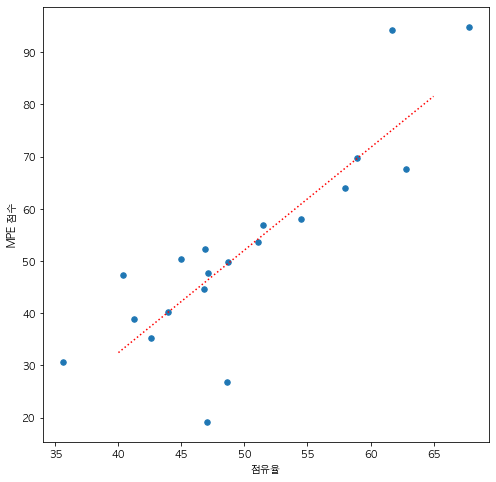

In [106]:
LastGraph(Win_Rate_epl['Possession'],Win_Rate_epl['MPE Points'])

이 값은 관련이 없다고 볼 수 있다.

Enter the xlabel : 점유율
Enter the ylabel : 오차율


/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


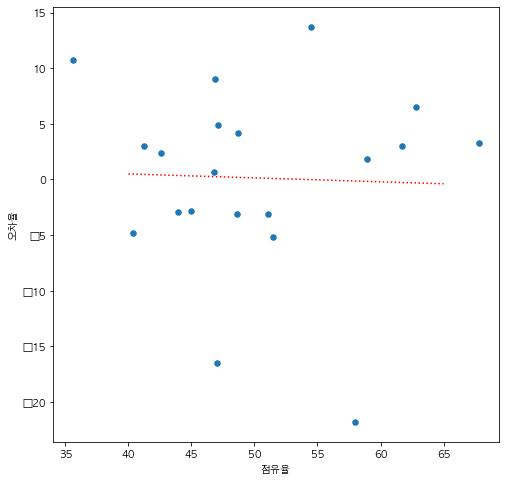

In [108]:
LastGraph(Win_Rate_epl['Possession'],Win_Rate_epl['Error Rate'])

이 결과는 점유율과 관계성을 높게 띈다고 할 수 있다.

In [123]:
Bundese1819 = csvReader('bundese1819','../Bundeseliga Data(csv)/Bundeseliga_18_19_D.csv')
Bundese1819.set_index('Team', inplace = True)
Bundese1819

,Possession,All Goals For,All Goals Against,Real Points
Team,,,,
Arminia,46.6,51,61,32
Bayern Munich,65.5,88,32,78
Dortumund,58.0,81,44,76
Düsseldorf,43.1,49,65,44
Eint Frankfurt,47.3,60,48,54
Freiburg,44.2,46,61,36
Hannover 96,46.3,31,71,21
Hertha BSC,48.1,49,57,43
Hoffenheim,53.6,70,52,51


In [113]:
#Bundeseliga는 18/19 시즌 34경기를 했다.
Arminia = MPE(51,61,34,32)
Bayern = MPE(88,32,34,78)
Dortumund = MPE(81,44,34,76)
Dussel = MPE(49,65,34,44)
Eint = MPE(60,48,34,54)
Frei = MPE(46,61,34,36)
Han = MPE(31,71,34,21)
Hertha = MPE(49,57,34,43)
Hoffen = MPE(70,52,34,51)
Lever = MPE(69,52,34,58)
Glad = MPE(55,42,34,55)
Mainz = MPE(46,57,34,43)
Nurn = MPE(26,68,34,19)
RB = MPE(63,29,34,66)
Schalke = MPE(37,55,34,33)
Stutt = MPE(32,70,34,28)
Werder = MPE(58,49,34,53)
Wolfs = MPE(58,49,34,53)

In [114]:
WR2 = pd.DataFrame({'Team' : ['Arminia','Bayern Munich','Dortumund','Düsseldorf','Eint Frankfurt','Freiburg',\
                              'Hannover 96','Hertha BSC','Hoffenheim','Leverkusen','M’Gladbach','Mainz',\
                              'Nürnberg','RB Leipzig','Schalke 04','Stuttgart','Werder Bremen','Wolfsburg'],
    'MPE Points' : [Arminia[0],Bayern[0],Dortumund[0],Dussel[0],Eint[0],Frei[0],Han[0],Hertha[0],\
                         Hoffen[0],Lever[0],Glad[0],Mainz[0],Nurn[0],RB[0],Schalke[0],Stutt[0],\
                          Werder[0],Wolfs[0]],
                  'Error Rate' : [Arminia[1],Bayern[1],Dortumund[1],Dussel[1],Eint[1],Frei[1],Han[1],Hertha[1],\
                         Hoffen[1],Lever[1],Glad[1],Mainz[1],Nurn[1],RB[1],Schalke[1],Stutt[1],\
                          Werder[1],Wolfs[1]]},index = [0,1,2,3,4,5,6,7,8,9,10,11,\
                                                                                       12,13,14,15,16,17])
WR2

,Team,MPE Points,Error Rate
0,Arminia,41.149553,-22.234878
1,Bayern Munich,75.607825,3.163925
2,Dortumund,64.688901,17.485379
3,Düsseldorf,38.267917,14.978822
4,Eint Frankfurt,52.940773,2.000778
5,Freiburg,38.238681,-5.854492
6,Hannover 96,24.813530,-15.368751
7,Hertha BSC,41.900184,2.624849
8,Hoffenheim,55.327636,-7.821835
9,Leverkusen,54.882570,5.680183


In [115]:
WR2.set_index('Team', inplace = True)
WR2

,MPE Points,Error Rate
Team,,
Arminia,41.149553,-22.234878
Bayern Munich,75.607825,3.163925
Dortumund,64.688901,17.485379
Düsseldorf,38.267917,14.978822
Eint Frankfurt,52.940773,2.000778
Freiburg,38.238681,-5.854492
Hannover 96,24.813530,-15.368751
Hertha BSC,41.900184,2.624849
Hoffenheim,55.327636,-7.821835


In [124]:
Win_Rate_bundese= pd.merge(Bundese1819,WR2,on = 'Team')
Win_Rate_bundese

,Possession,All Goals For,All Goals Against,Real Points,MPE Points,Error Rate
Team,,,,,,
Arminia,46.6,51,61,32,41.149553,-22.234878
Bayern Munich,65.5,88,32,78,75.607825,3.163925
Dortumund,58.0,81,44,76,64.688901,17.485379
Düsseldorf,43.1,49,65,44,38.267917,14.978822
Eint Frankfurt,47.3,60,48,54,52.940773,2.000778
Freiburg,44.2,46,61,36,38.238681,-5.854492
Hannover 96,46.3,31,71,21,24.813530,-15.368751
Hertha BSC,48.1,49,57,43,41.900184,2.624849
Hoffenheim,53.6,70,52,51,55.327636,-7.821835


Enter the xlabel : 점유율
Enter the ylabel : MPE 점수


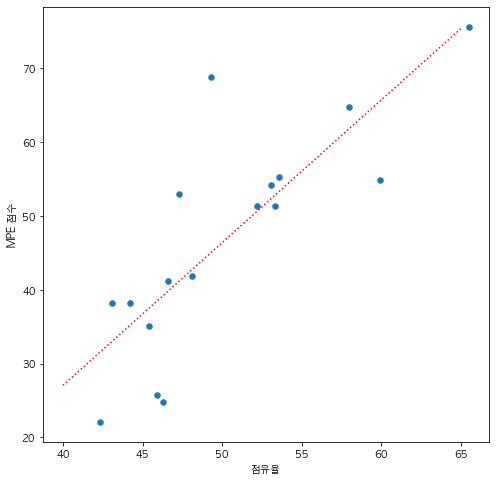

In [117]:
LastGraph(Win_Rate_bundese['Possession'],Win_Rate_bundese['MPE Points'])

점유율이 높아질수록 평균값보다 큰 값이 많아지는 것이 보인다.

Enter the xlabel : 점유율
Enter the ylabel : 오차율


/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


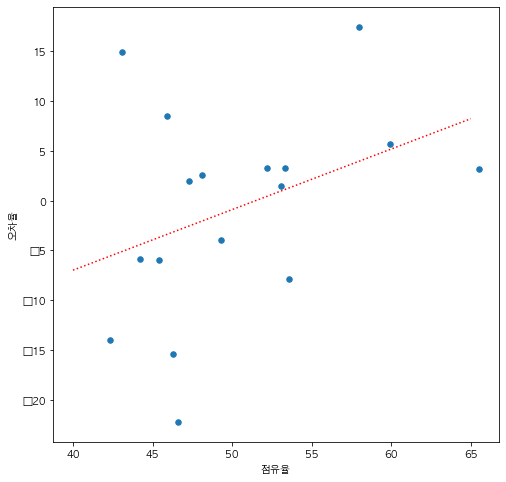

In [118]:
LastGraph(Win_Rate_bundese['Possession'],Win_Rate_bundese['Error Rate'])

이 값은 큰 관계성이 없는 것 같다.

In [125]:
Serie1819 = csvReader('Serie1819','../Serie A Data(csv)/Serie_A_18_19_D.csv')
Serie1819.set_index('Team', inplace = True)
Serie1819

,Possession,All Goals For,All Goals Against,Real Points
Team,,,,
Atalanta,57.8,77,46,69
Bologna,44.7,48,56,44
Cagliari,50.0,36,54,41
Chievo,43.1,25,75,20
Empoli,47.9,51,70,38
Fiorentina,50.7,47,45,41
Frosinone,41.1,29,69,25
Genoa,43.1,39,57,38
Inter Milan,59.6,57,33,69


In [126]:
#Serie A는 18/19 시즌 38경기를 했다.
Atalanta = MPE(77,46,38,69)
Bolonga = MPE(48,56,38,44)
Cag = MPE(36,54,38,41)
Chievo = MPE(25,75,38,20)
Empoli = MPE(51,70,38,38)
Fio = MPE(47,45,38,41)
Fro = MPE(29,69,38,25)
Genoa = MPE(39,57,38,38)
Inter = MPE(57,33,38,69)
Juv = MPE(70,30,38,90)
Lazio = MPE(56,46,38,59)
AC = MPE(55,36,38,68)
Na = MPE(74,36,38,79)
Parma = MPE(41,61,38,41)
Roma = MPE(66,48,38,66)
Sam = MPE(60,51,38,53)
Sas = MPE(53,60,38,43)
SPAL = MPE(44,56,38,42)
Torino = MPE(52,37,38,63)
Udi = MPE(39,53,38,43)

In [127]:
WR3 = pd.DataFrame({'Team' : ['Atalanta','Bologna','Cagliari','Chievo','Empoli','Fiorentina','Frosinone',\
                              'Genoa','Inter Milan','Juventus','Lazio','AC Milan','Napoli','Parma','Roma',\
                              'Sampodoria','Sassuolo','SPAL','Torino','Udinese'],
    'MPE Points' : [Atalanta[0],Bolonga[0],Cag[0],Chievo[0],Empoli[0],Fio[0],Fro[0],Genoa[0],\
                         Inter[0],Juv[0],Lazio[0],AC[0],Na[0],Parma[0],Roma[0],Sam[0],Sas[0],SPAL[0],Torino[0],\
                   Udi[0]],
                  'Error Rate' : [Atalanta[1],Bolonga[1],Cag[1],Chievo[1],Empoli[1],Fio[1],Fro[1],Genoa[1],\
                         Inter[1],Juv[1],Lazio[1],AC[1],Na[1],Parma[1],Roma[1],Sam[1],Sas[1],SPAL[1],Torino[1],\
                   Udi[1]]},index = [0,1,2,3,4,5,6,7,8,9,10,11,\
                                                                                       12,13,14,15,16,17,18,19])
WR3

,Team,MPE Points,Error Rate
0,Atalanta,69.146128,-0.211333
1,Bologna,46.720892,-5.823715
2,Cagliari,38.938367,5.294606
3,Chievo,21.836814,-8.411547
4,Empoli,41.765145,-9.015040
5,Fiorentina,53.002478,-22.645127
6,Frosinone,26.828224,-6.814553
7,Genoa,39.738348,-4.374486
8,Inter Milan,69.566292,-0.814032
9,Juventus,79.203277,13.631663


In [128]:
WR3.set_index('Team', inplace = True)
WR3

,MPE Points,Error Rate
Team,,
Atalanta,69.146128,-0.211333
Bologna,46.720892,-5.823715
Cagliari,38.938367,5.294606
Chievo,21.836814,-8.411547
Empoli,41.765145,-9.015040
Fiorentina,53.002478,-22.645127
Frosinone,26.828224,-6.814553
Genoa,39.738348,-4.374486
Inter Milan,69.566292,-0.814032


In [129]:
Win_Rate_serie= pd.merge(Serie1819,WR3,on = 'Team')
Win_Rate_serie

,Possession,All Goals For,All Goals Against,Real Points,MPE Points,Error Rate
Team,,,,,,
Atalanta,57.8,77,46,69,69.146128,-0.211333
Bologna,44.7,48,56,44,46.720892,-5.823715
Cagliari,50.0,36,54,41,38.938367,5.294606
Chievo,43.1,25,75,20,21.836814,-8.411547
Empoli,47.9,51,70,38,41.765145,-9.015040
Fiorentina,50.7,47,45,41,53.002478,-22.645127
Frosinone,41.1,29,69,25,26.828224,-6.814553
Genoa,43.1,39,57,38,39.738348,-4.374486
Inter Milan,59.6,57,33,69,69.566292,-0.814032


Enter the xlabel : 점유율
Enter the ylabel : MPE 점수


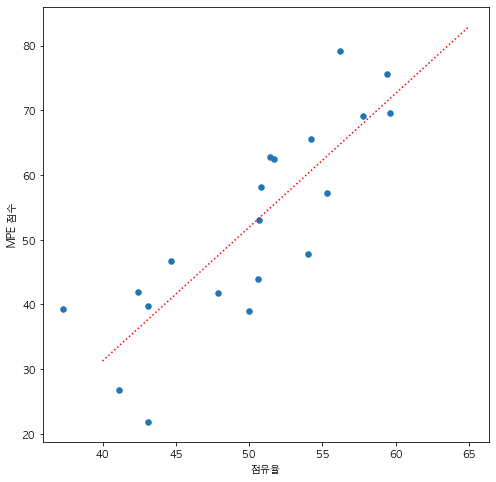

In [130]:
LastGraph(Win_Rate_serie['Possession'],Win_Rate_serie['MPE Points'])

점유율이 커질수록 평균위의 값이 많아지므록 관계성을 가진다고 할 수 있다.

Enter the xlabel : 점유율
Enter the ylabel : 오차율


/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/baesuhan/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


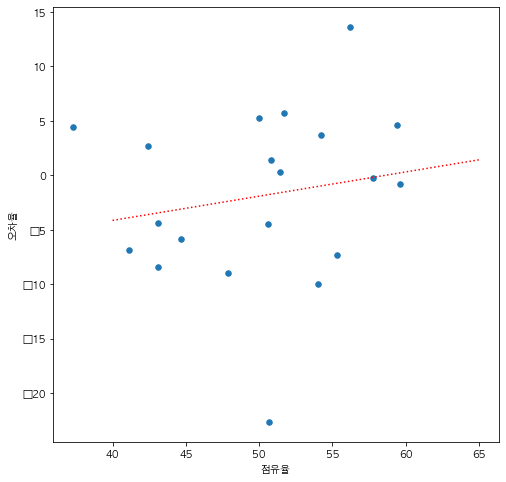

In [131]:
LastGraph(Win_Rate_serie['Possession'],Win_Rate_serie['Error Rate'])

이 결과는 점유율이 커질수록 오차율이 작고 평균보다 위에 있는 값이 커지므로 관계성을 가진다.

# 6. 결론

<b>1. 점유율과 공격성<b>
점유율과 공격성을 비교했을 때는 거의 아무런 관계성을 가지지 못한다고 위의 결과를 통해 결론을 내렸다.

<b>2. 점유율과 승리 확률을 비교했을 때는 MPE는 점유율과 높은 관계성을 가진다고 볼 수 있다. <br>(위에서 MPE 승점과의 관계성이 높다면
    승률과의 관계성이 높다고 전제하였다.)<br>
    따라서 점유율이 높으면 승리 확률이 높다고 볼 수 있다.<b>

# **(7) 참고문헌** 

``파이썬으로 데이터 주무르기 독특한 예제를 통해 배우는 데이터 분석 입문``, 민형기 지음, 비제이퍼블릭, 2017년 12월 29일 출간<br> -> ``numpy``, ``pandas``,``matplotlib.pyplot`` 사용법 <br>
                     
   ``파이썬 기초 with 데이터 분석-시각화 파이썬 입문 예제 중심``, 황재호 지음, 인포앤북, 2020년 06월 01일 출간

# **(8) (3)의 획득한 데이터 원본**
   8-1) xG, xGA, x Pts, All Goals For, All Goals Against의 값들 - > https://footballxg.com/xg-league-tables/

   8-2) Possession, Touches in Attacking 1/3 area, Touches in Attacking Penalty area, Shots Total, Matches Played의         값들
    -> https://fbref.com/en/comps/12/10731/possession/2020-2021-La-Liga-Stats

   8-3) Real Points , Number of Wins, Number of Loses의 값들
    -> https://www.sofascore.com/tournament/football/spain/laliga/8

   8-4)바르셀로나 경기 당 xG값의 값들 - > https://understat.com<br>

실제로 csv파일을 다운 받은 것이 아니기 때문에 획득한 데이터 원본의 위의 사이트와 같다.

# **(9) (4)의 가공된 데이터 원본** 

 8-1) xG, xGA, x Pts, All Goals For, All Goals Against의 값들 - > https://footballxg.com/xg-league-tables/

   8-2) Possession, Touches in Attacking 1/3 area, Touches in Attacking Penalty area, Shots Total, Matches Played의         값들
    -> https://fbref.com/en/comps/12/10731/possession/2020-2021-La-Liga-Stats

   8-3) Real Points , Number of Wins, Number of Loses의 값들
    -> https://www.sofascore.com/tournament/football/spain/laliga/8

   8-4)바르셀로나 경기 당 xG값의 값들 - > https://understat.com<br>

실제로 csv파일을 다운 받은 것이 아니기 때문에 획득한 데이터 원본의 위의 사이트와 같다.

# (10) 만든 함수

In [135]:
# 1)
def csvReader(x,y) :
    import pandas as pd
    x = pd.read_csv(y,encoding = 'utf-8')
    return x
    
# 2)
def corrcoef(x,y) :
    import numpy as np
    k = np.corrcoef(x,y)
    corrcoef = abs(k[0][1])
    if corrcoef <= 0.1 :
        del y
        return '삭제됨'
    if corrcoef <= 0.3:
        listSmall = [corrcoef,'약한 상관관계']
        return listSmall
    if corrcoef <= 0.7 :
        listDistinct = [corrcoef,'뚜렷한 상관관계']
        return listDistinct
    if corrcoef <= 1 :
        listStrong = [corrcoef,'강한 상관관계']
        return listStrong
        
# 3)
def makeBarh(x) : 
    import matplotlib.pyplot as plt
    x.sort_values().plot(kind = 'barh',figsize = (10,10))
    return plt.show()
    
# 4)
def LastGraph(x,y) :
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import rc
    rc('font',family = 'AppleGothic')
    coefficient = np.polyfit(x,y,1)
    fy = np.poly1d(coefficient)
    fx = np.linspace(40,65,3)
    plt.figure(figsize = (8,8))
    plt.scatter(x,y,s = 30)
    plt.plot(fx,fy(fx),linestyle = ':',color = 'red')
    x = str(input('Enter the xlabel : '))
    y = str(input('Enter the ylabel : '))
    plt.xlabel(x)
    plt.ylabel(y)
    
    return plt.show()
    
# 5)
def HighRelationship() :
    from matplotlib import rc
    rc('font',family = 'AppleGothic')
    x = str(input('Enter the High relationship : '))
    y = str(input('Enter the High relationship : '))
    z = str(input('Enter the High relationship : '))
    w = str(input('Enter the High relationship : '))
    a = str(input('Enter the High relationship : '))
    b = str(input('Enter the High relationship : '))
    c = str(input('Enter the High relationship : '))
    d = str(input('Enter the High relationship : '))
    e = str(input('Enter the High relationship : '))
    List = [x,y,z,w,a,b,c,d,e]
    return List

# 6)
def LowRelationship() :
    from matplotlib import rc
    rc('font',family = 'AppleGothic')
    x = str(input('Enter the Low relationship : '))
    y = str(input('Enter the Low relationship : '))
    z = str(input('Enter the Low relationship : '))
    w = str(input('Enter the Low relationship : '))
    a = str(input('Enter the Low relationship : '))
    b = str(input('Enter the Low relationship : '))
    c = str(input('Enter the Low relationship : '))
    d = str(input('Enter the Low relationship : '))
    e = str(input('Enter the Low relationship : '))
    List = [x,y,z,w,a,b,c,d,e]
    return List
    

# 7)
def firstWR(x,y) :
    """(float,float) -> float
    x = Number of Wins
    y = Matches Played
    Return the Win Rate
    """
    W = (x/y) * 100
    return W
    
    
# 8)
def secondWR(x,y,z) : 
    """(float,float,float) -> float
    x = Number of Wins
    y = Number of Loses
    z = Matches Played
    Return the Win Rate
    """
    W = (x + (0.5 * (z-y-x))) / z * 100
    return W
    
# 9)
def thirdWR(x,y,z) :
    """(float,float,float) -> float
    x = Goals For
    y = Goals Against
    z = Matches Played
    Return the Win Rate
    """
    W = (x**1.122777 / (x**1.072388 + y**1.127248)) * 2.499973 * z
    return W
   
# 10)
def errorRate(x,y) : 
    """
    x = Real Points
    y = MPE Points
    """
    result = ((x - y) / y) * 100
    return str(result) + '%'
    
    
# 11)
def MPE(x,y,z,k) :
    W = (x**1.122777 / (x**1.072388 + y**1.127248)) * 2.499973 * z
    errorRate = ((k - W) / W ) * 100
    return [W,errorRate]